# **Project Name : ✨Car Price Prediction 🚗🚗  ✨**

AUTHOR : **Jamshed Butt** from **Data Science**

# **Import Libraries**

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

#Normalize Data
from sklearn.preprocessing import StandardScaler

#Conert Categorical to Numerical Value
from sklearn.preprocessing import LabelEncoder

#Columns Relationship for target value
from sklearn.feature_selection import mutual_info_classif,SelectKBest,f_classif

#Splitting Data
from sklearn.model_selection import train_test_split,cross_val_score

#PCA
from sklearn.decomposition import PCA

#Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge


#Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#from sklearn.metrics._plot.roc_curve import auc

# **Load Dataset**

In [238]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [239]:
df.shape

(205, 26)

In [240]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [242]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [243]:
df["CarName"].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

# **Univariate Analysis**

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### **Categorical Data**

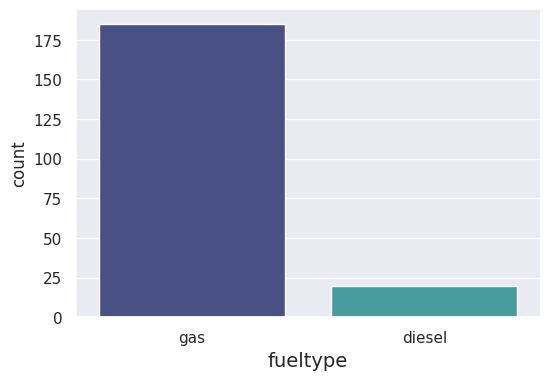

In [245]:
plt.figure(figsize=(6,4))
sns.countplot(x='fueltype' , data=df ,palette='mako')
plt.xlabel('fueltype', fontsize=14)
plt.show()

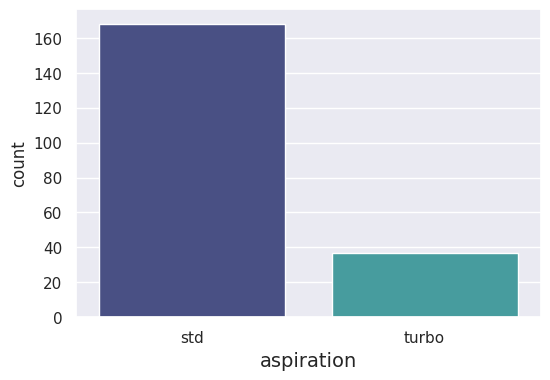

In [246]:
plt.figure(figsize=(6,4))
sns.countplot(x='aspiration' , data=df ,palette='mako')
plt.xlabel('aspiration', fontsize=14)
plt.show()

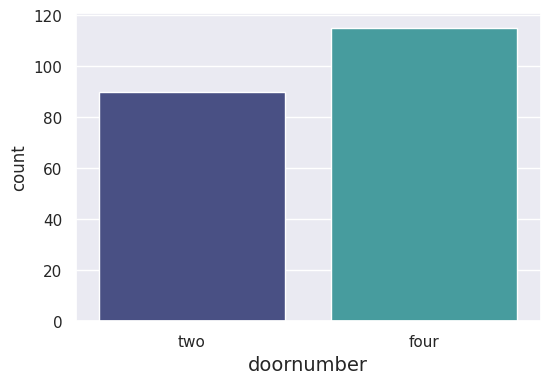

In [247]:
plt.figure(figsize=(6,4))
sns.countplot(x='doornumber' , data=df ,palette='mako')
plt.xlabel('doornumber', fontsize=14)
plt.show()

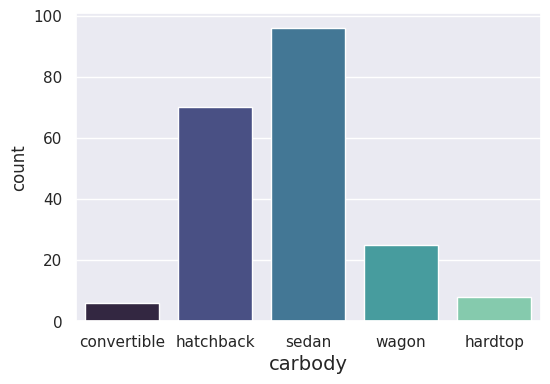

In [248]:
plt.figure(figsize=(6,4))
sns.countplot(x='carbody' , data=df ,palette='mako')
plt.xlabel('carbody', fontsize=14)
plt.show()

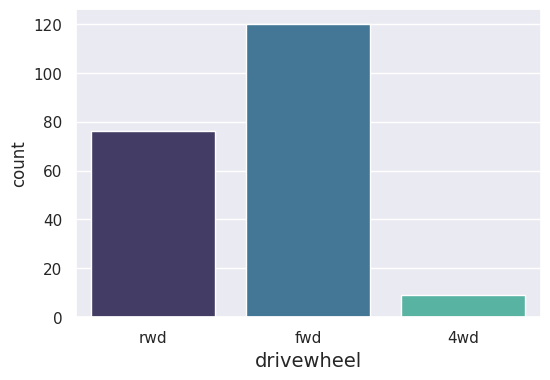

In [249]:
plt.figure(figsize=(6,4))
sns.countplot(x='drivewheel' , data=df ,palette='mako')
plt.xlabel('drivewheel', fontsize=14)
plt.show()

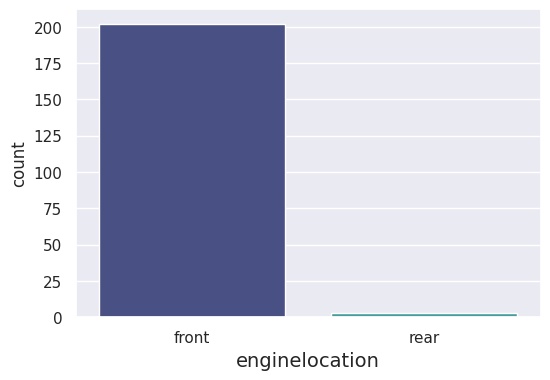

In [250]:
plt.figure(figsize=(6,4))
sns.countplot(x='enginelocation' , data=df ,palette='mako')
plt.xlabel('enginelocation', fontsize=14)
plt.show()

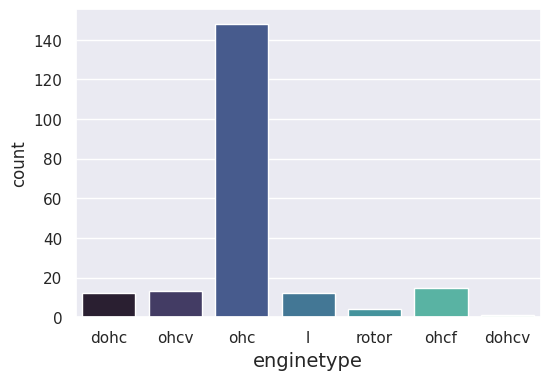

In [251]:
plt.figure(figsize=(6,4))
sns.countplot(x='enginetype' , data=df ,palette='mako')
plt.xlabel('enginetype', fontsize=14)
plt.show()

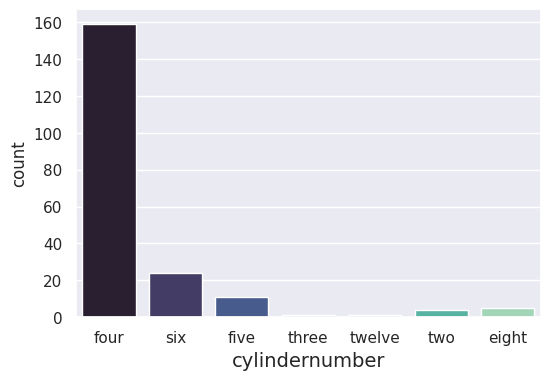

In [252]:
plt.figure(figsize=(6,4))
sns.countplot(x='cylindernumber' , data=df ,palette='mako')
plt.xlabel('cylindernumber', fontsize=14)
plt.show()

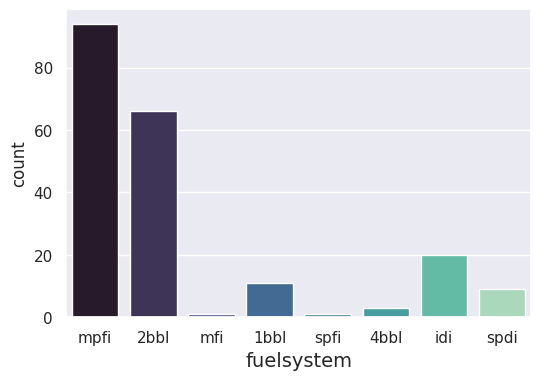

In [253]:
plt.figure(figsize=(6,4))
sns.countplot(x='fuelsystem' , data=df ,palette='mako')
plt.xlabel('fuelsystem', fontsize=14)
plt.show()

#### **Numerical Data**

<ipython-input-254-abac86350aed>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["symboling"], kde=True, color="orange", bins=10)


<Axes: xlabel='symboling', ylabel='Density'>

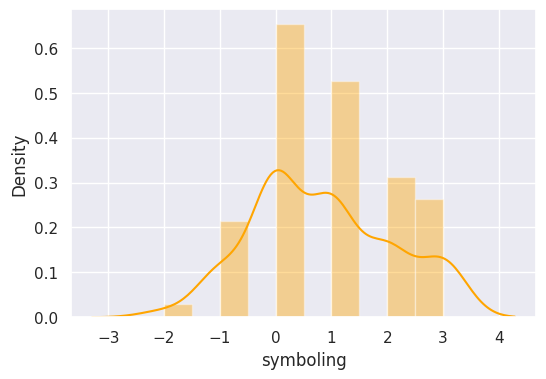

In [254]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["symboling"], kde=True, color="orange", bins=10)

<ipython-input-255-c02d41bbd045>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["wheelbase"], kde=True, color="orange", bins=10)


<Axes: xlabel='wheelbase', ylabel='Density'>

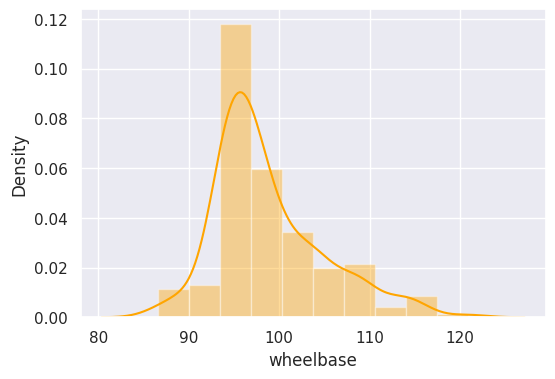

In [255]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["wheelbase"], kde=True, color="orange", bins=10)

<ipython-input-256-1ec7de8e8cab>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["carlength"], kde=True, color="orange", bins=10)


<Axes: xlabel='carlength', ylabel='Density'>

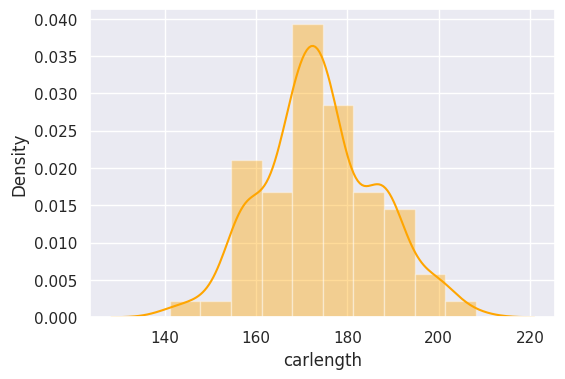

In [256]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["carlength"], kde=True, color="orange", bins=10)

<ipython-input-257-84f1c82220a3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["carwidth"], kde=True, color="orange", bins=10)


<Axes: xlabel='carwidth', ylabel='Density'>

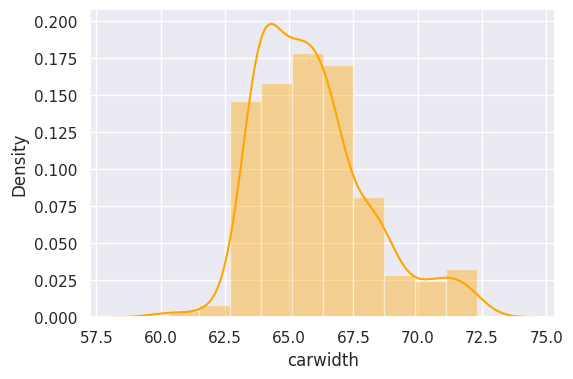

In [257]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["carwidth"], kde=True, color="orange", bins=10)

<ipython-input-258-3a91cc5beecd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["carheight"], kde=True, color="orange", bins=10)


<Axes: xlabel='carheight', ylabel='Density'>

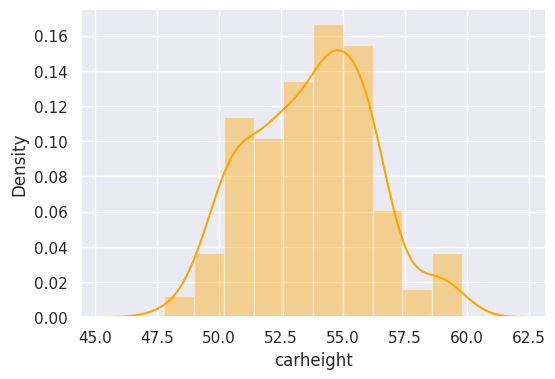

In [258]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["carheight"], kde=True, color="orange", bins=10)

<ipython-input-259-deab17bd35f5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["curbweight"], kde=True, color="orange", bins=10)


<Axes: xlabel='curbweight', ylabel='Density'>

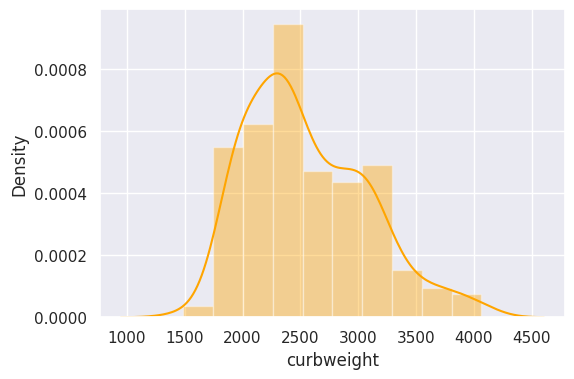

In [259]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["curbweight"], kde=True, color="orange", bins=10)

<ipython-input-260-06ba97e738c6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["enginesize"], kde=True, color="orange", bins=10)


<Axes: xlabel='enginesize', ylabel='Density'>

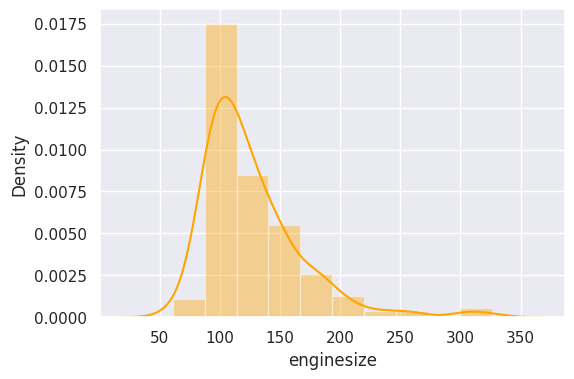

In [260]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["enginesize"], kde=True, color="orange", bins=10)

<ipython-input-261-4bf018894454>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["boreratio"], kde=True, color="orange", bins=10)


<Axes: xlabel='boreratio', ylabel='Density'>

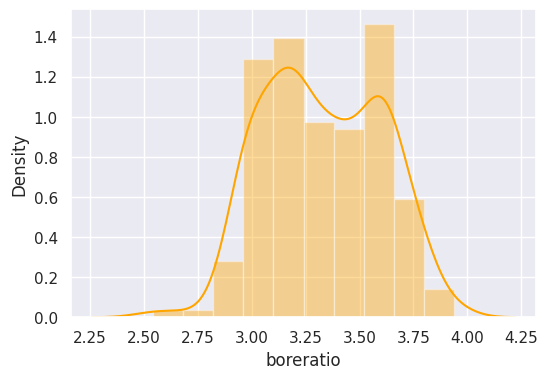

In [261]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["boreratio"], kde=True, color="orange", bins=10)

<ipython-input-262-1e3936c3f84c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["stroke"], kde=True, color="orange", bins=10)


<Axes: xlabel='stroke', ylabel='Density'>

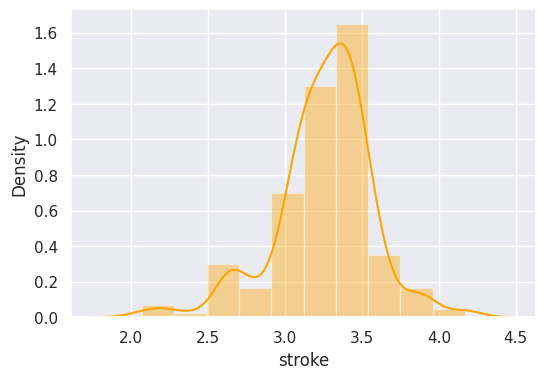

In [262]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["stroke"], kde=True, color="orange", bins=10)

<ipython-input-263-bdf77303f0d5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["compressionratio"], kde=True, color="orange", bins=10)


<Axes: xlabel='compressionratio', ylabel='Density'>

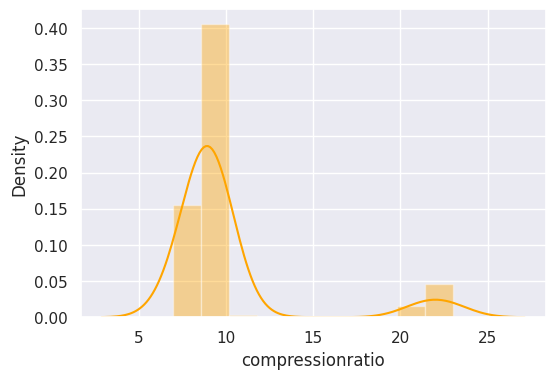

In [263]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["compressionratio"], kde=True, color="orange", bins=10)

<ipython-input-264-929ca17da2b3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["horsepower"], kde=True, color="orange", bins=10)


<Axes: xlabel='horsepower', ylabel='Density'>

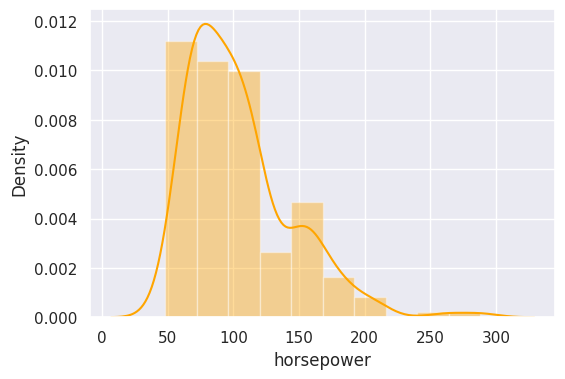

In [264]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["horsepower"], kde=True, color="orange", bins=10)

<ipython-input-265-5b6674878ec6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["peakrpm"], kde=True, color="orange", bins=10)


<Axes: xlabel='peakrpm', ylabel='Density'>

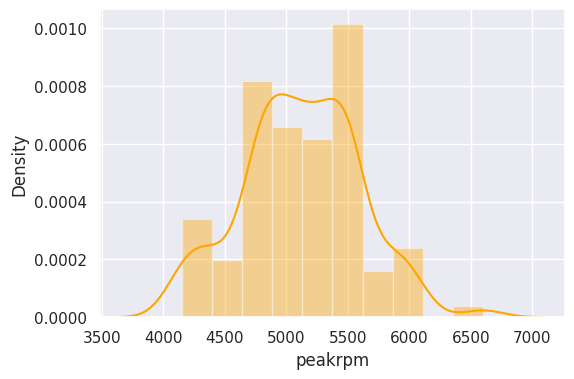

In [265]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["peakrpm"], kde=True, color="orange", bins=10)

<ipython-input-266-313140d11e4a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["citympg"], kde=True, color="orange", bins=10)


<Axes: xlabel='citympg', ylabel='Density'>

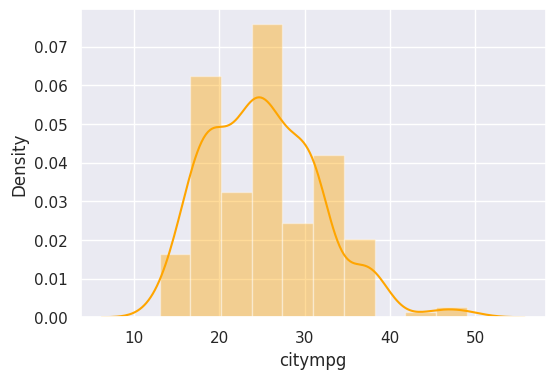

In [266]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["citympg"], kde=True, color="orange", bins=10)

<ipython-input-267-060fe6ea79fe>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["highwaympg"], kde=True, color="orange", bins=10)


<Axes: xlabel='highwaympg', ylabel='Density'>

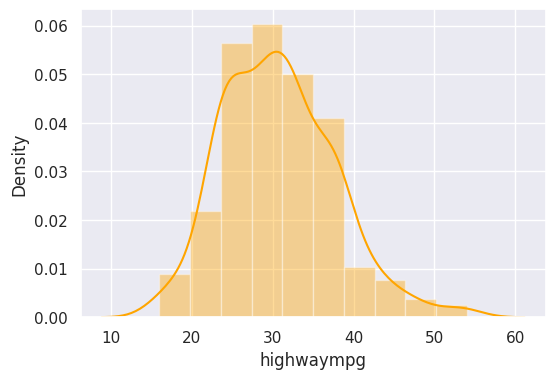

In [267]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["highwaympg"], kde=True, color="orange", bins=10)

<ipython-input-268-24d7eb5af33d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"], kde=True, color="orange", bins=10)


<Axes: xlabel='price', ylabel='Density'>

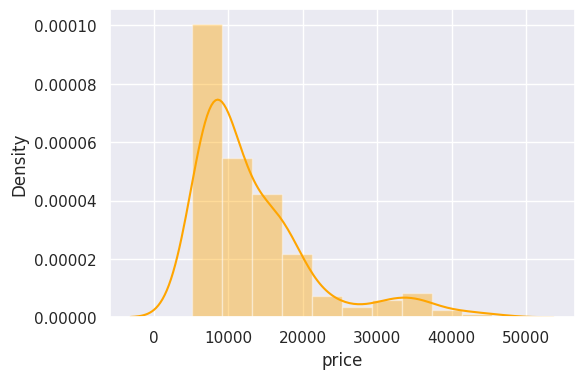

In [268]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["price"], kde=True, color="orange", bins=10)

# **EDA (Exploratory Data Analysis)**

#### **Remove Duplicate**

In [269]:
df.duplicated().sum()

0

#### **Check And Remove NaN Values**

In [270]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### **Removing Outlier**

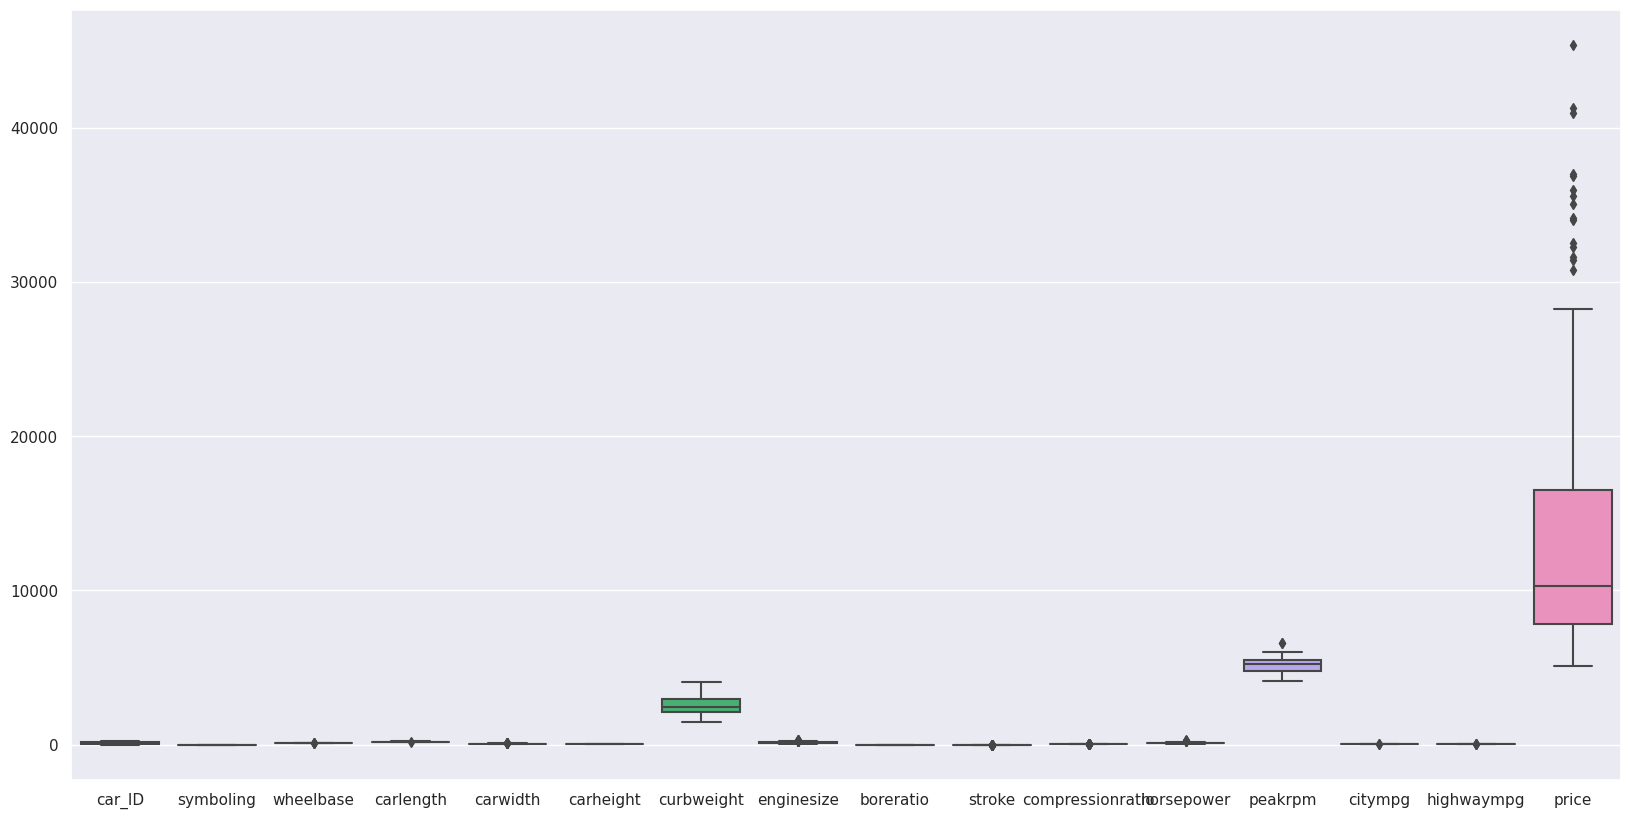

In [271]:
#Check Outliers
num_cols = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(20,10))
#num_cols.boxplot()
sns.boxplot(data=num_cols)
plt.show()

In [272]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [273]:
for i in num_cols.columns:
    lower_range,upper_range = remove_outlier(df[i])
    df[i] = np.where(df[i] > upper_range, upper_range, df[i])
    df[i] = np.where(df[i] < lower_range, lower_range, df[i])

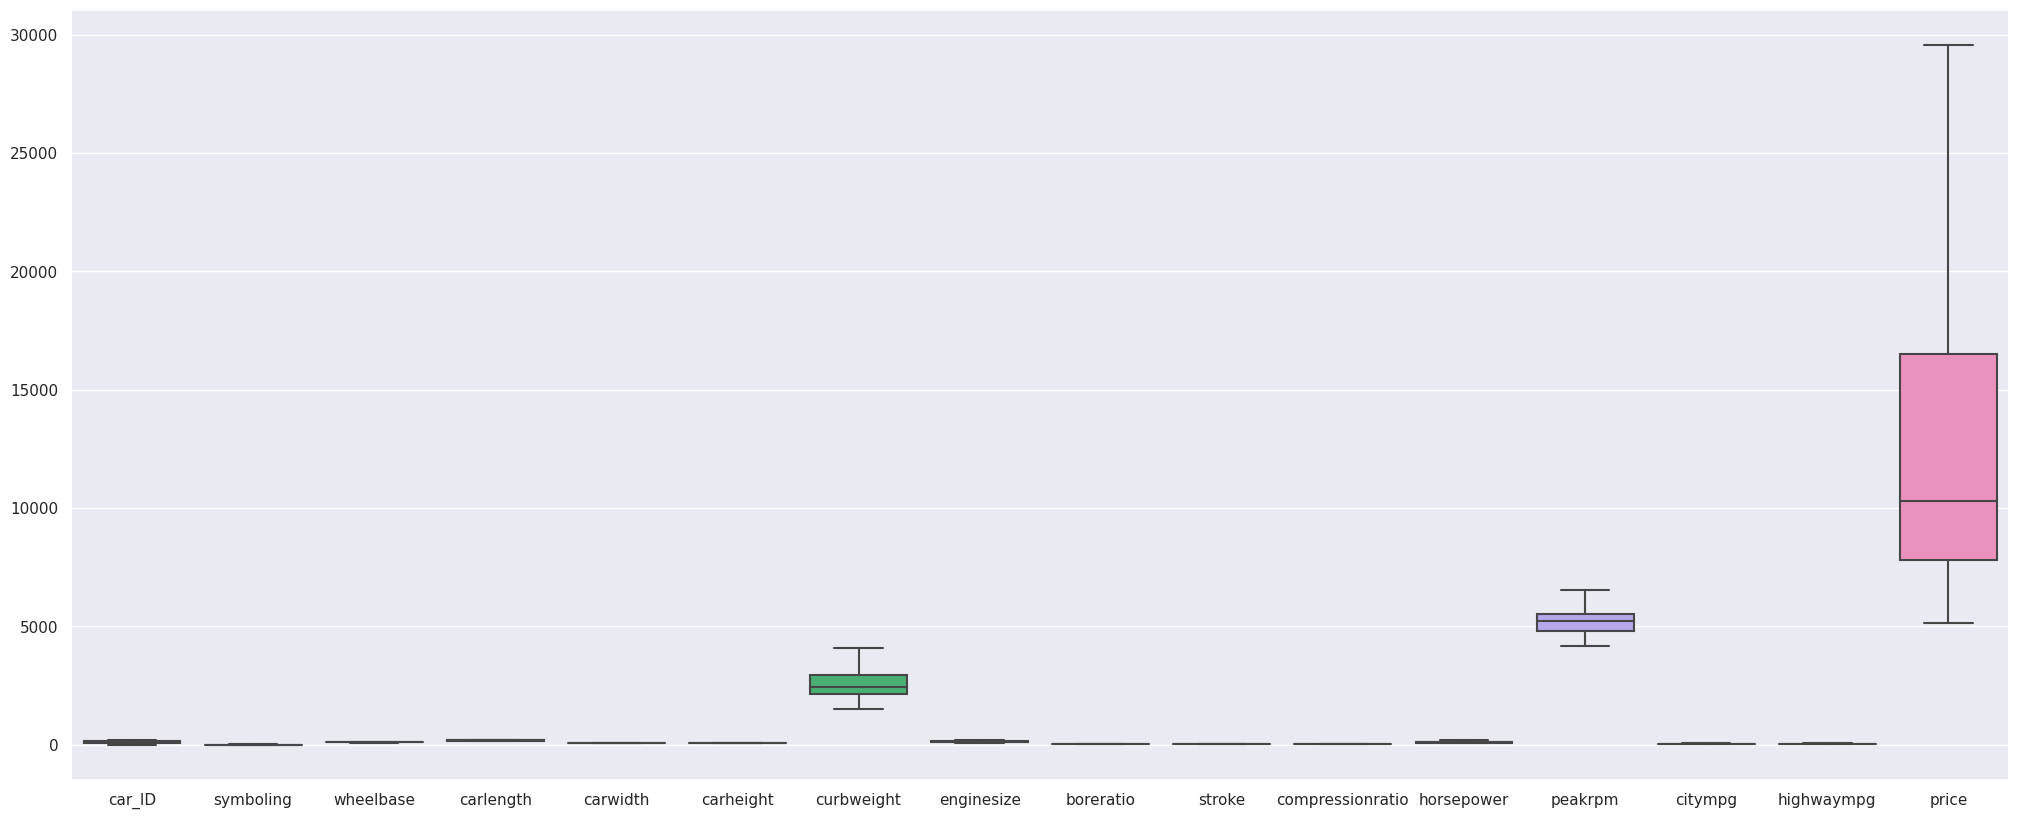

In [274]:
#Check Outliers
num_cols = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(25,10))
#num_cols.boxplot()
sns.boxplot(data=num_cols)
plt.show()

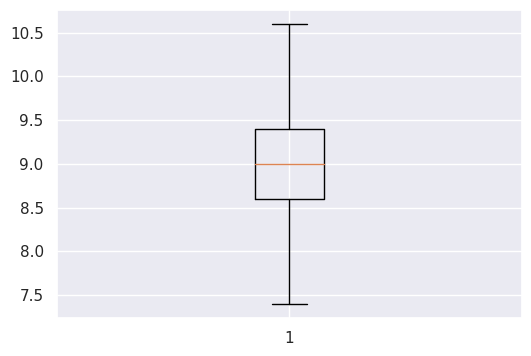

In [275]:
plt.boxplot(df["compressionratio"])
plt.show()

#### **Bivaraite Analysis**

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    float64
 1   symboling         205 non-null    float64
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    float64
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    float64
 1

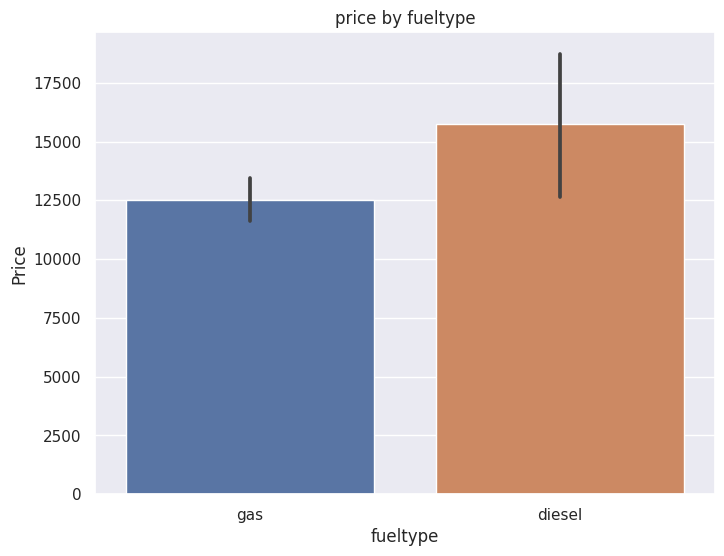

In [277]:
plt.figure(figsize=(8, 6))
sns.barplot(x='fueltype', y='price', data=df)
plt.title('price by fueltype')
plt.xlabel('fueltype')
plt.ylabel('Price')
plt.show()

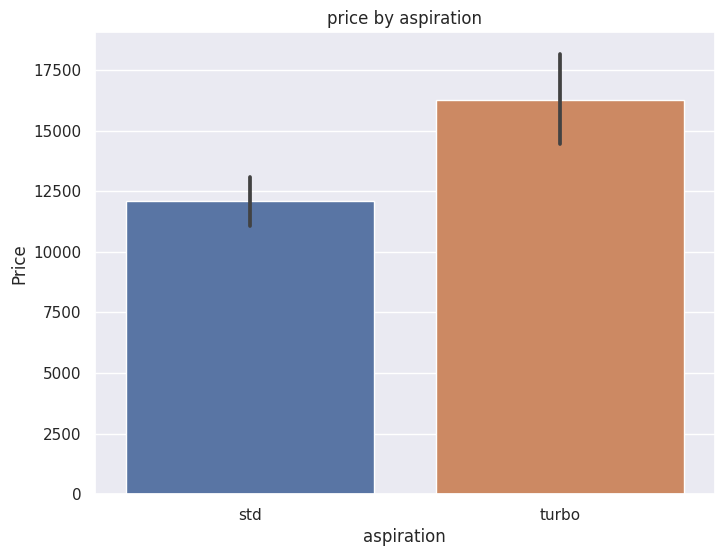

In [278]:
plt.figure(figsize=(8, 6))
sns.barplot(x='aspiration', y='price', data=df)
plt.title('price by aspiration')
plt.xlabel('aspiration')
plt.ylabel('Price')
plt.show()

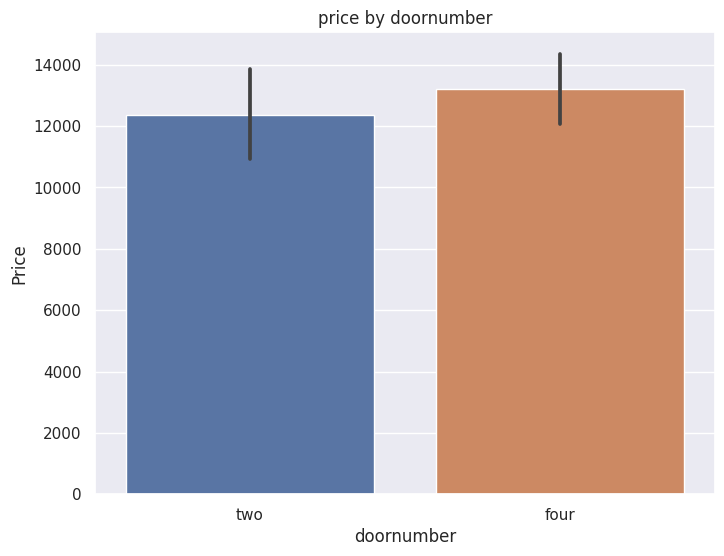

In [279]:
plt.figure(figsize=(8, 6))
sns.barplot(x='doornumber', y='price', data=df)
plt.title('price by doornumber')
plt.xlabel('doornumber')
plt.ylabel('Price')
plt.show()

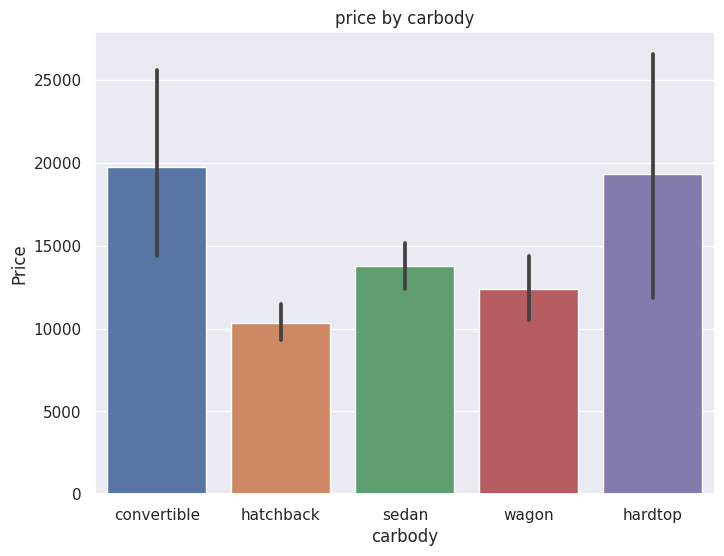

In [280]:
plt.figure(figsize=(8, 6))
sns.barplot(x='carbody', y='price', data=df)
plt.title('price by carbody')
plt.xlabel('carbody')
plt.ylabel('Price')
plt.show()

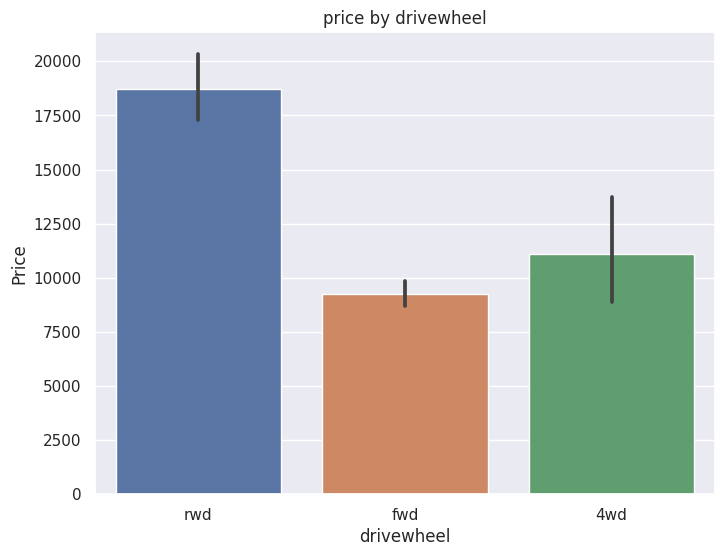

In [281]:
plt.figure(figsize=(8, 6))
sns.barplot(x='drivewheel', y='price', data=df)
plt.title('price by drivewheel')
plt.xlabel('drivewheel')
plt.ylabel('Price')
plt.show()

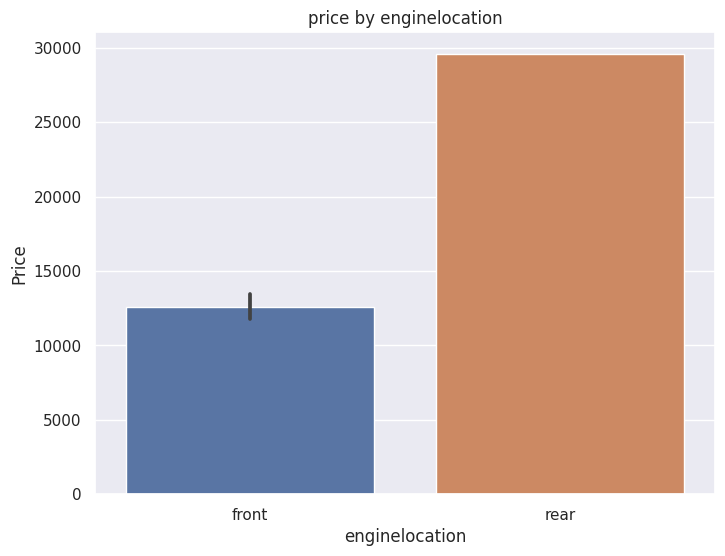

In [282]:
plt.figure(figsize=(8, 6))
sns.barplot(x='enginelocation', y='price', data=df)
plt.title('price by enginelocation')
plt.xlabel('enginelocation')
plt.ylabel('Price')
plt.show()

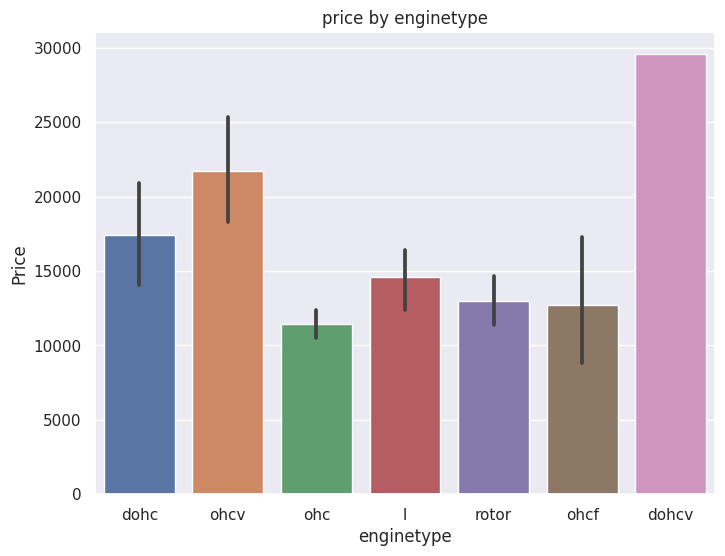

In [283]:
plt.figure(figsize=(8, 6))
sns.barplot(x='enginetype', y='price', data=df)
plt.title('price by enginetype')
plt.xlabel('enginetype')
plt.ylabel('Price')
plt.show()

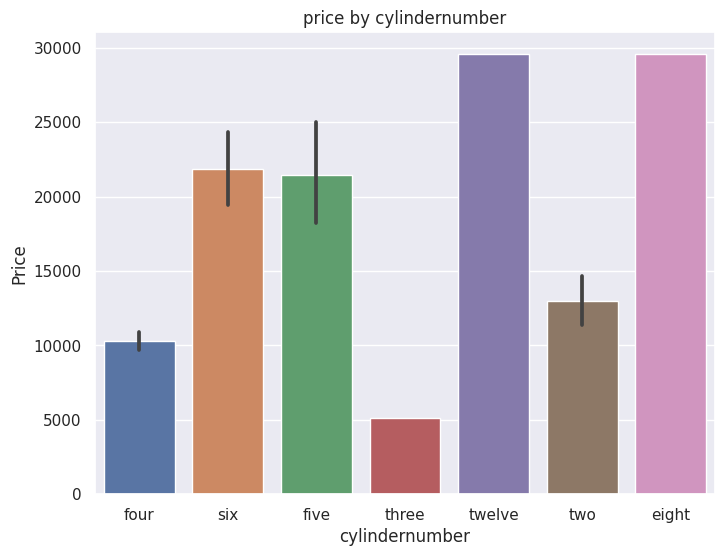

In [284]:
plt.figure(figsize=(8, 6))
sns.barplot(x='cylindernumber', y='price', data=df)
plt.title('price by cylindernumber')
plt.xlabel('cylindernumber')
plt.ylabel('Price')
plt.show()

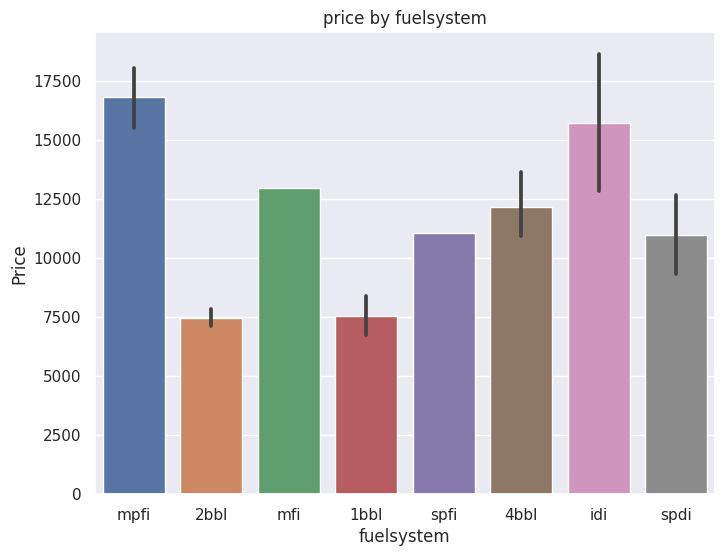

In [285]:
plt.figure(figsize=(8, 6))
sns.barplot(x='fuelsystem', y='price', data=df)
plt.title('price by fuelsystem')
plt.xlabel('fuelsystem')
plt.ylabel('Price')
plt.show()

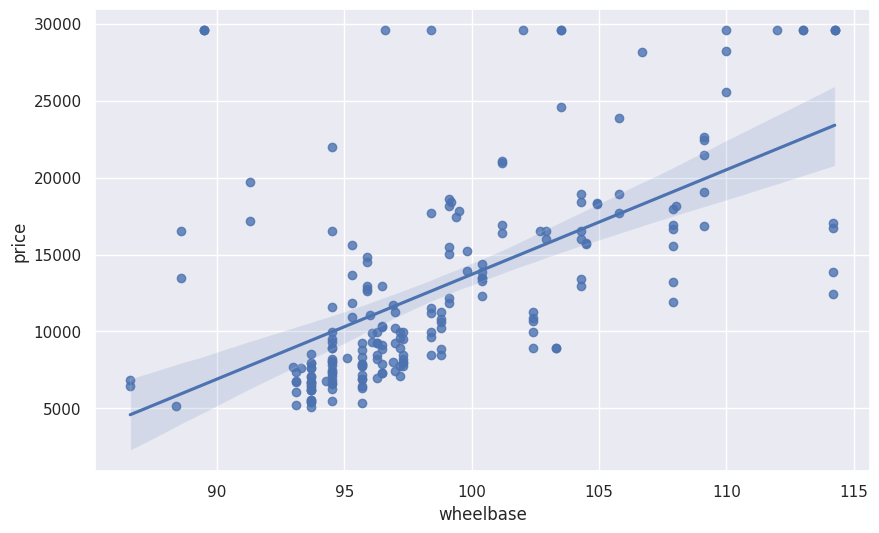

In [286]:
plt.figure(figsize=(10,6))
sns.regplot(x="wheelbase", y="price", data=df)
plt.show()

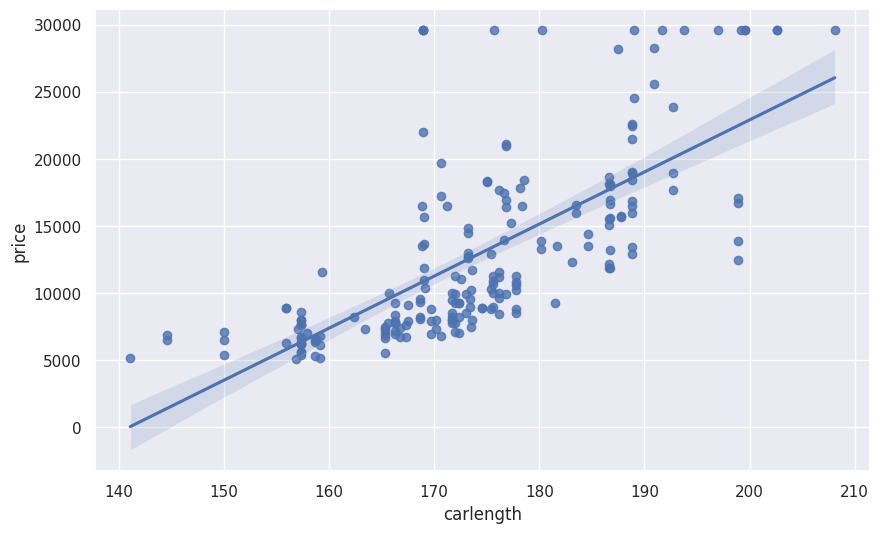

In [287]:
plt.figure(figsize=(10,6))
sns.regplot(x="carlength", y="price", data=df)
plt.show()

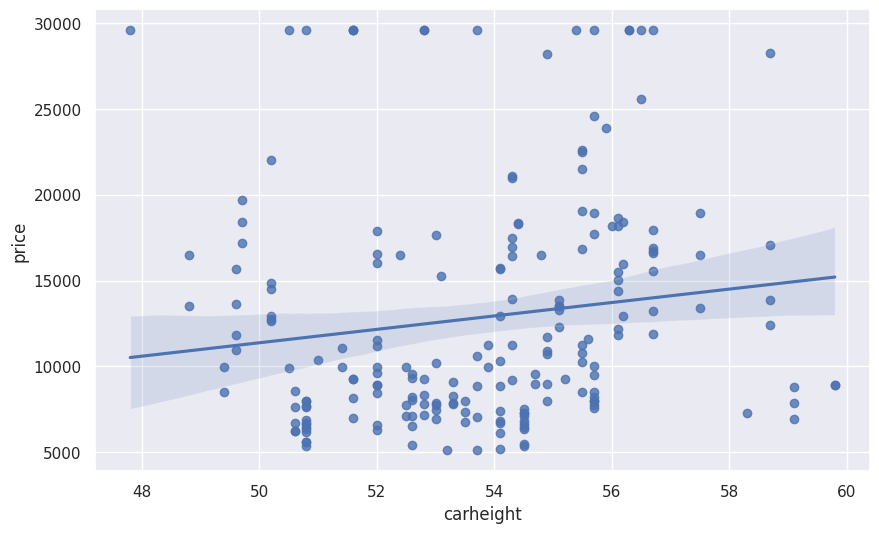

In [288]:
plt.figure(figsize=(10,6))
sns.regplot(x="carheight", y="price", data=df)
plt.show()

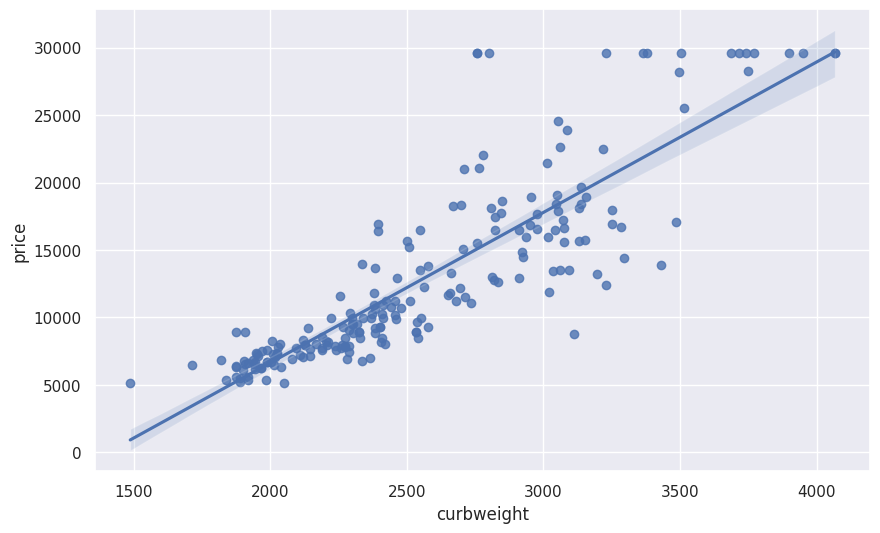

In [289]:
plt.figure(figsize=(10,6))
sns.regplot(x="curbweight", y="price", data=df)
plt.show()

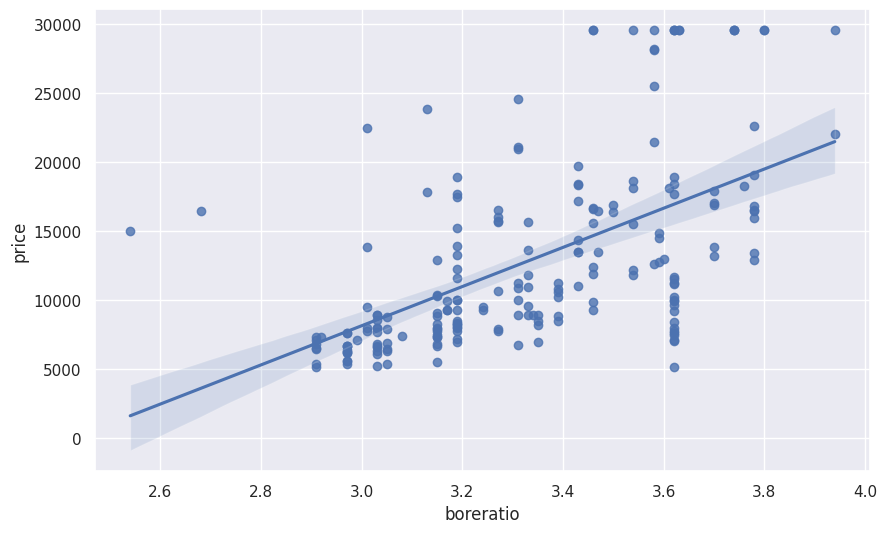

In [290]:
plt.figure(figsize=(10,6))
sns.regplot(x="boreratio", y="price", data=df)
plt.show()

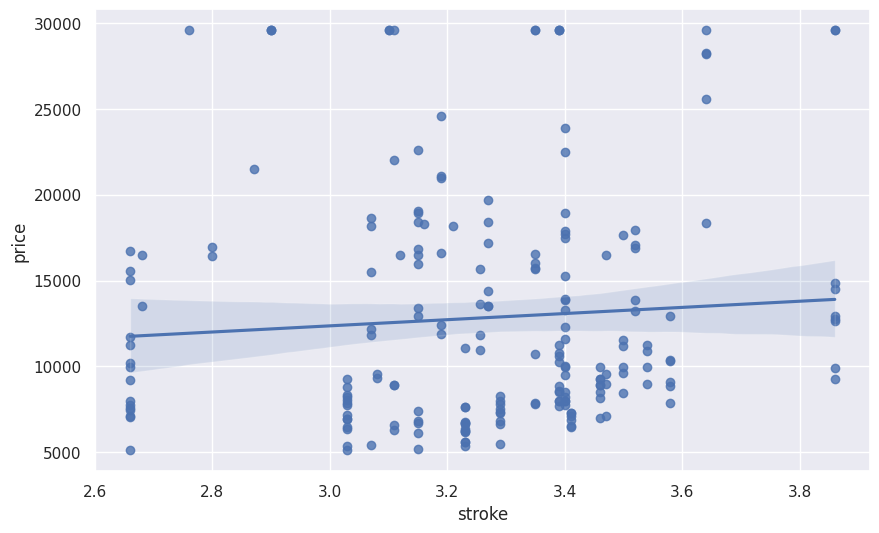

In [291]:
plt.figure(figsize=(10,6))
sns.regplot(x="stroke", y="price", data=df)
plt.show()

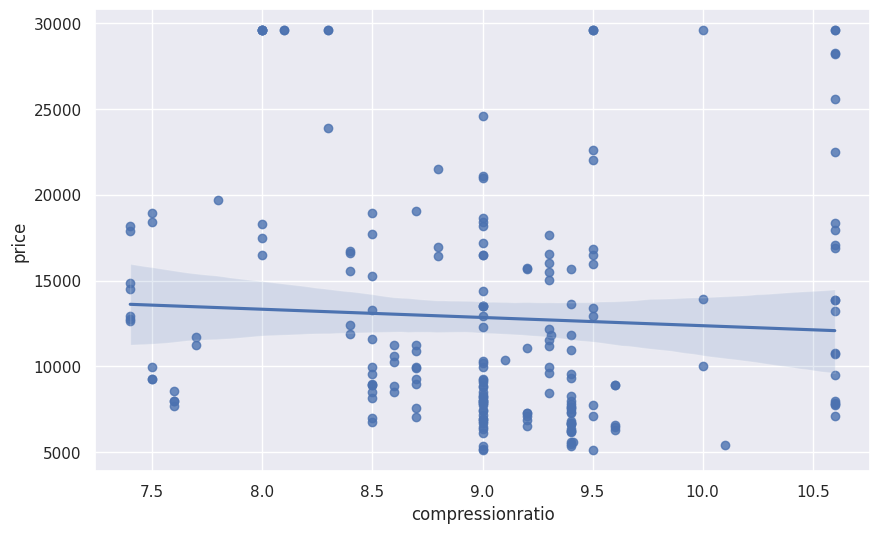

In [292]:
plt.figure(figsize=(10,6))
sns.regplot(x="compressionratio", y="price", data=df)
plt.show()

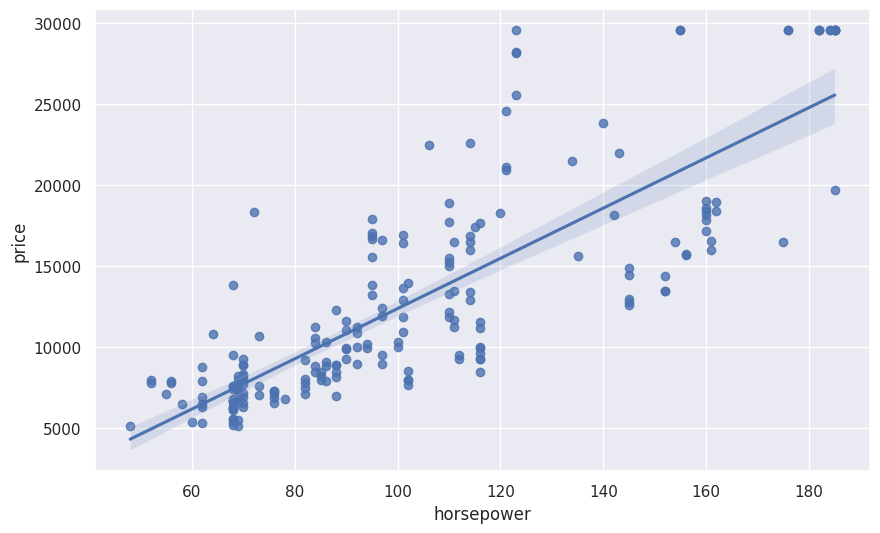

In [293]:
plt.figure(figsize=(10,6))
sns.regplot(x="horsepower", y="price", data=df)
plt.show()

<ipython-input-294-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


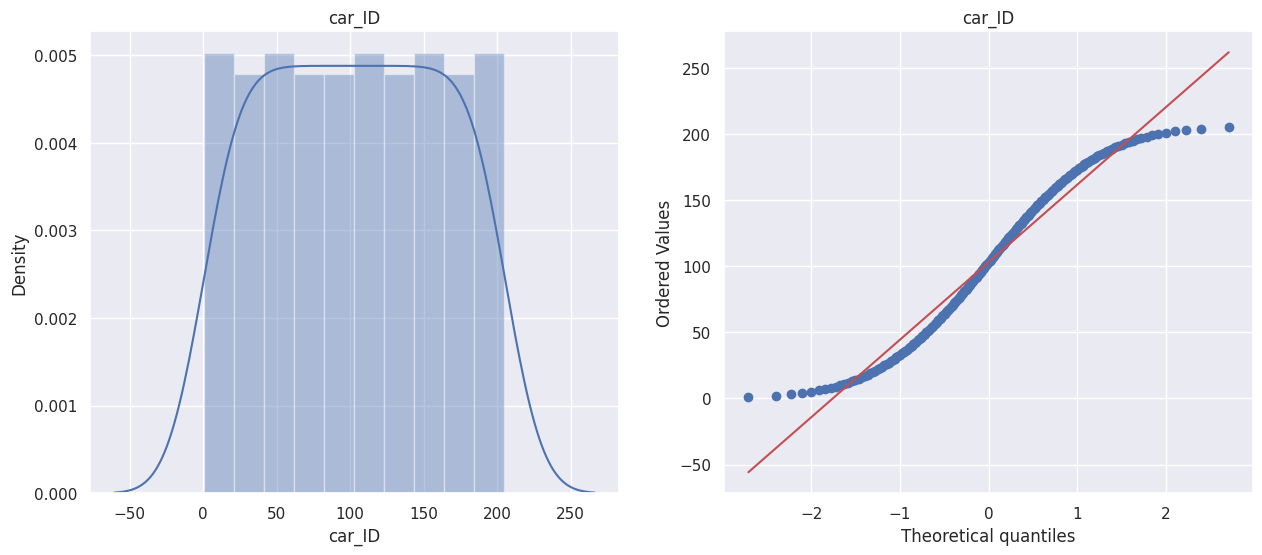

<ipython-input-294-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


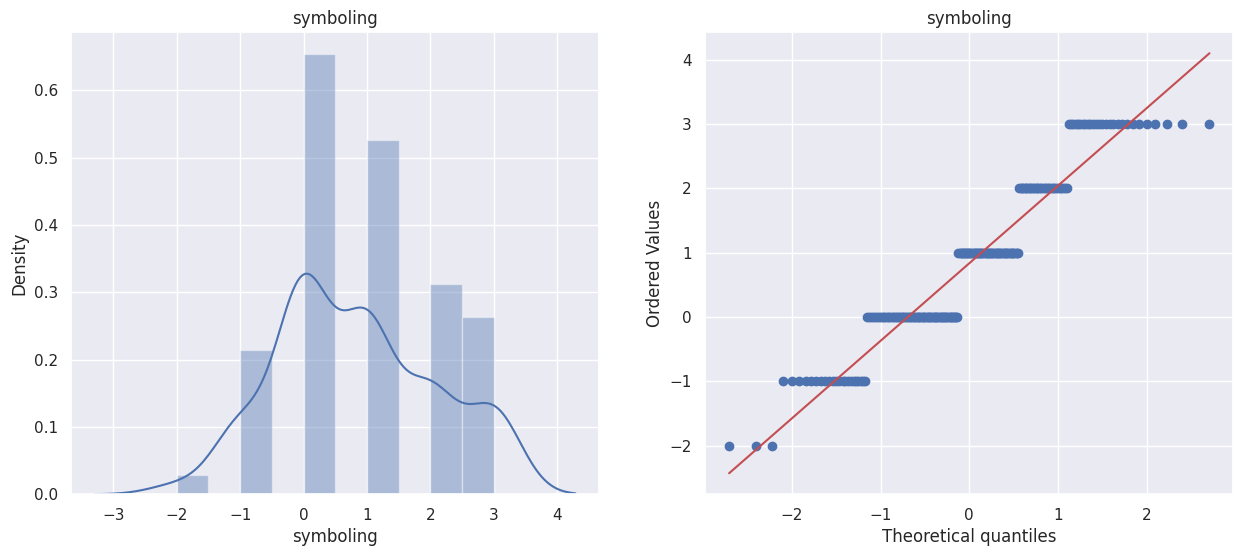

<ipython-input-294-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


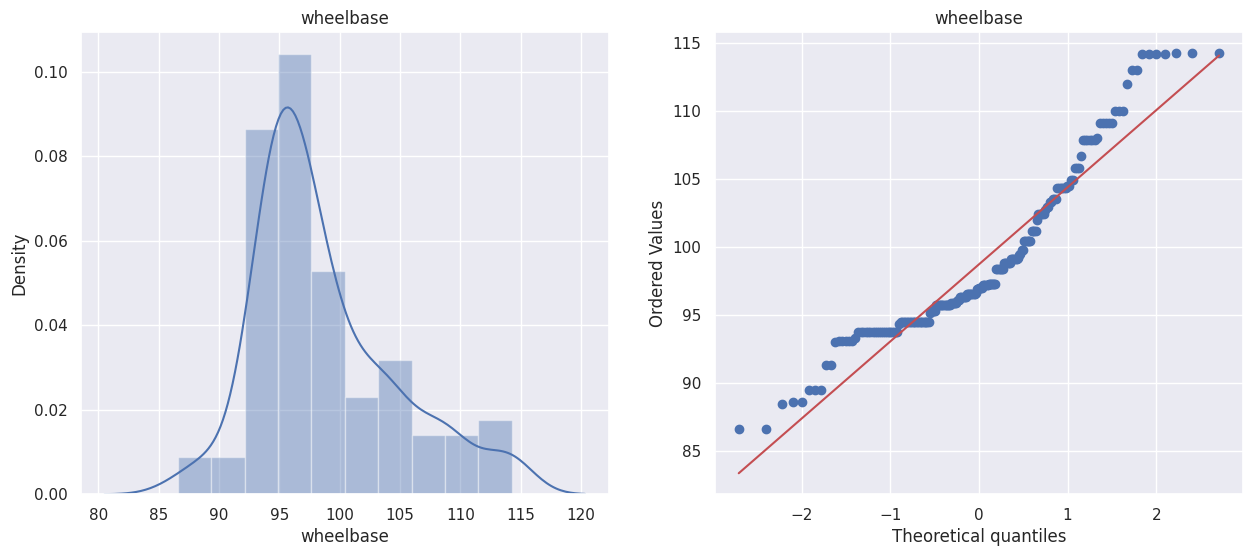

<ipython-input-294-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


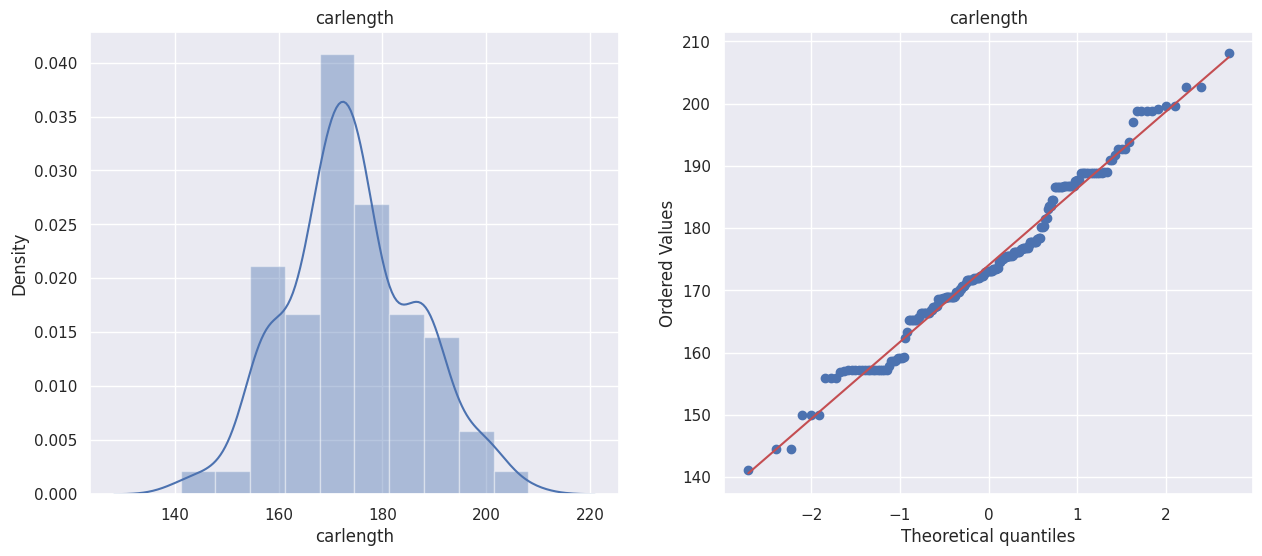

<ipython-input-294-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


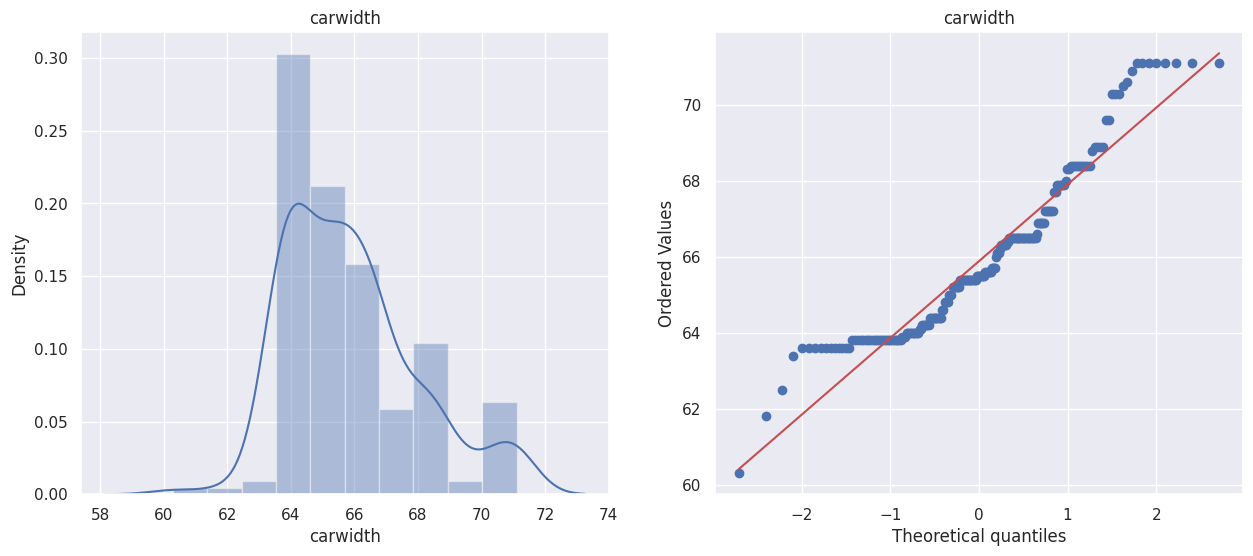

<ipython-input-294-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


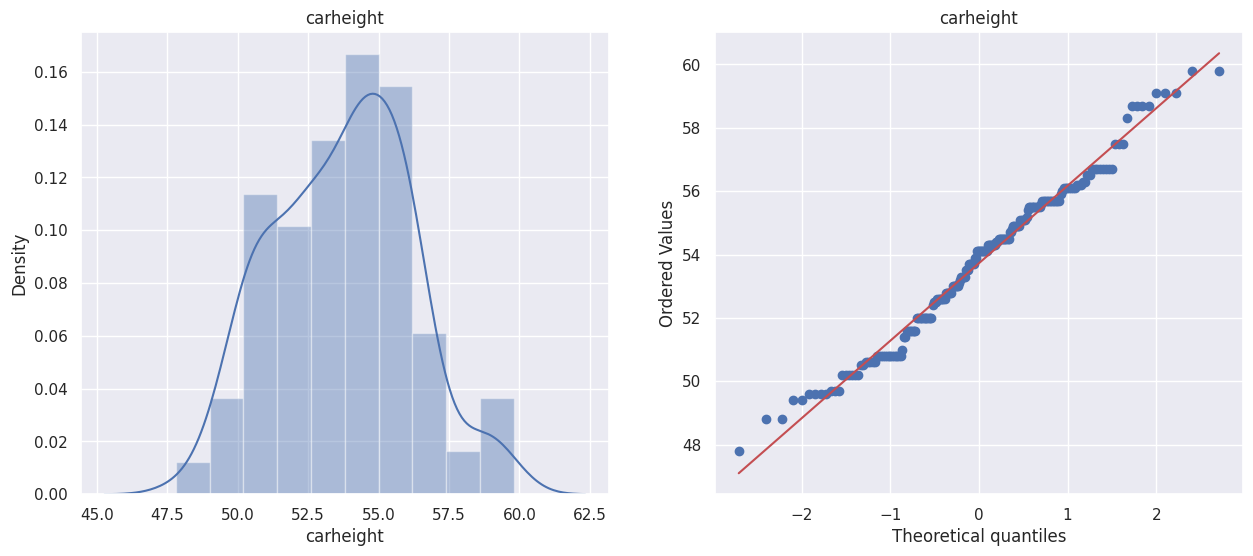

<ipython-input-294-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


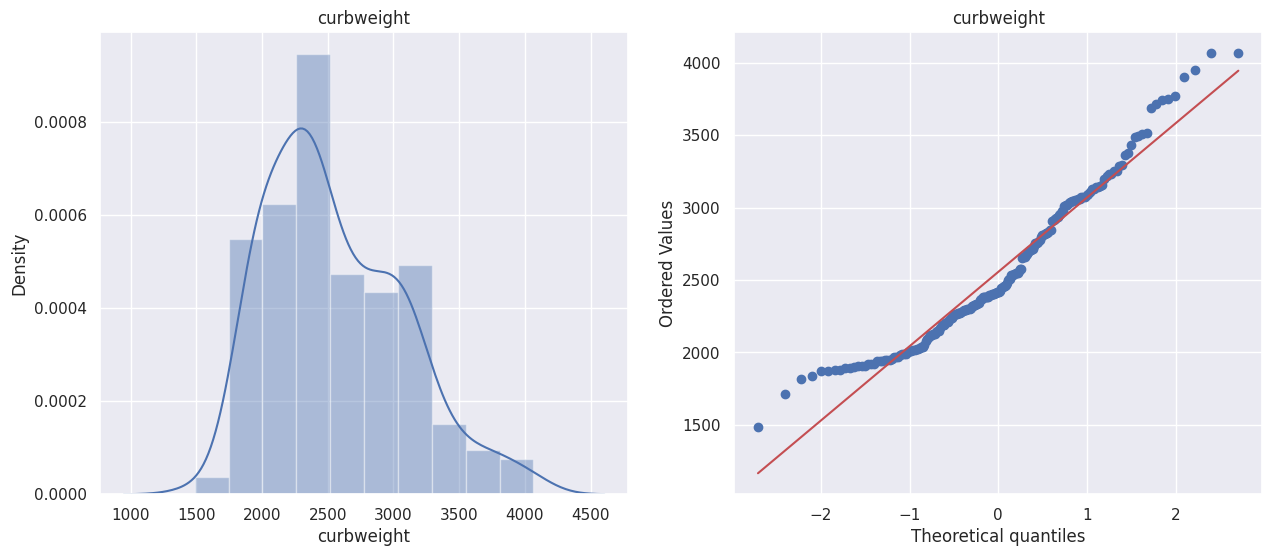

<ipython-input-294-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


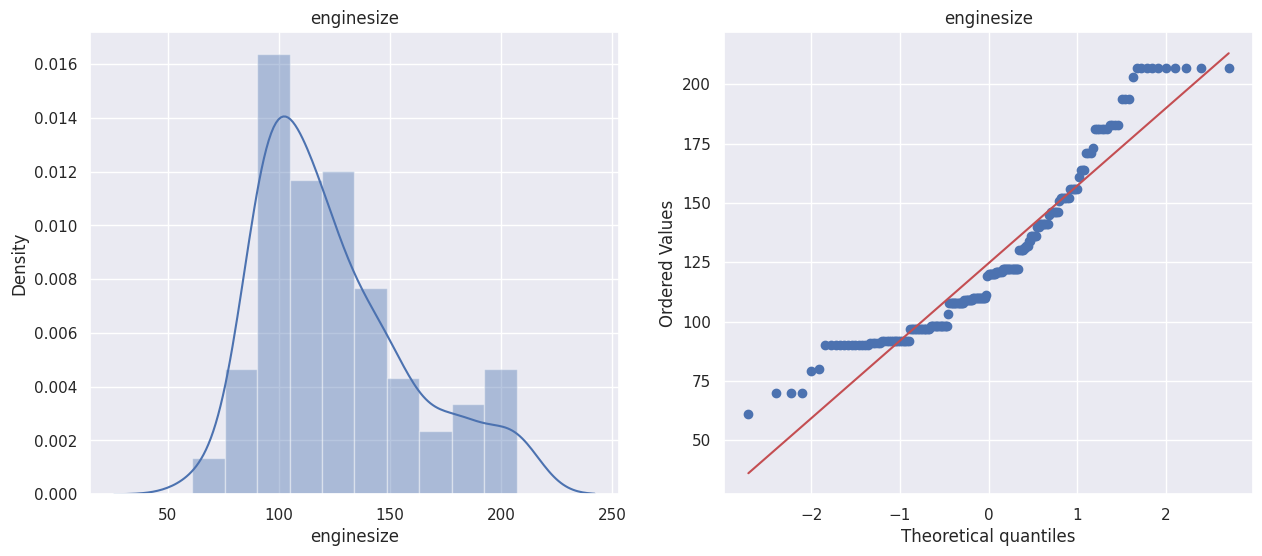

<ipython-input-294-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


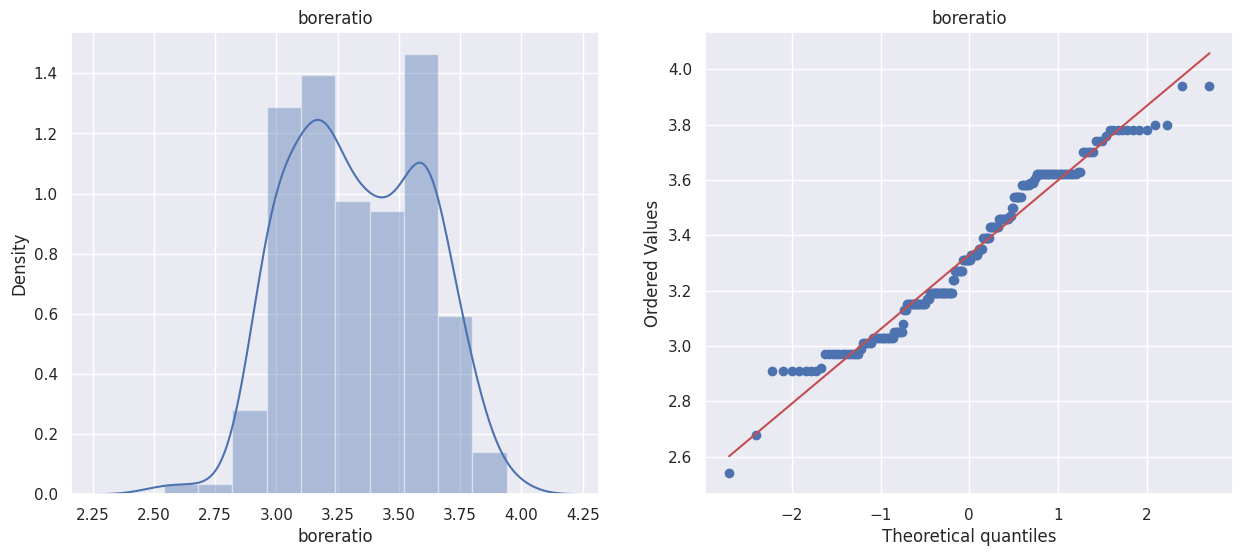

<ipython-input-294-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


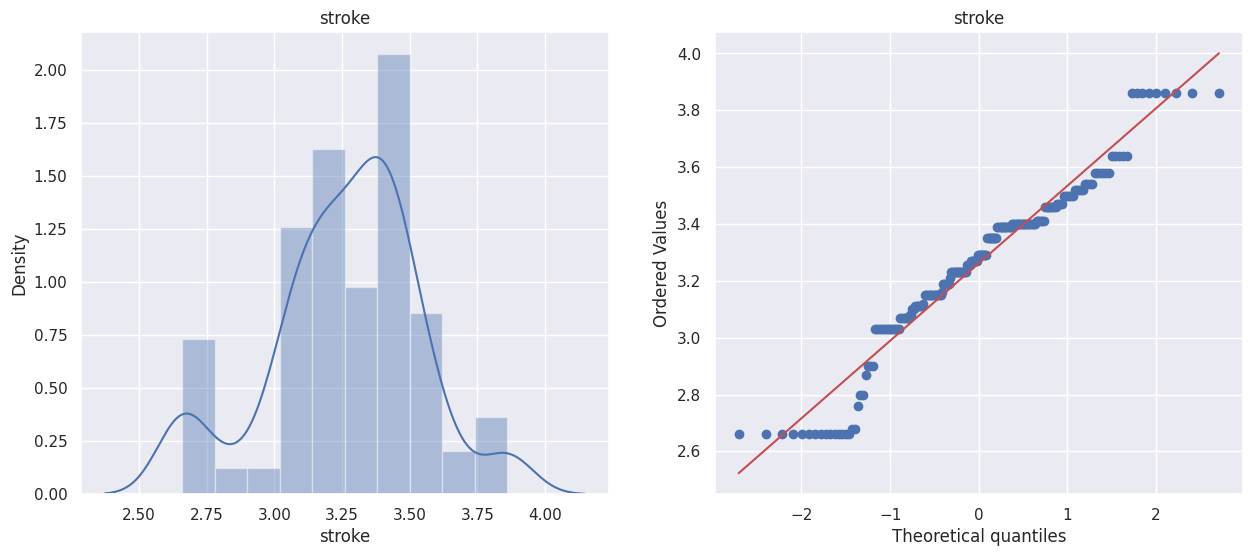

<ipython-input-294-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


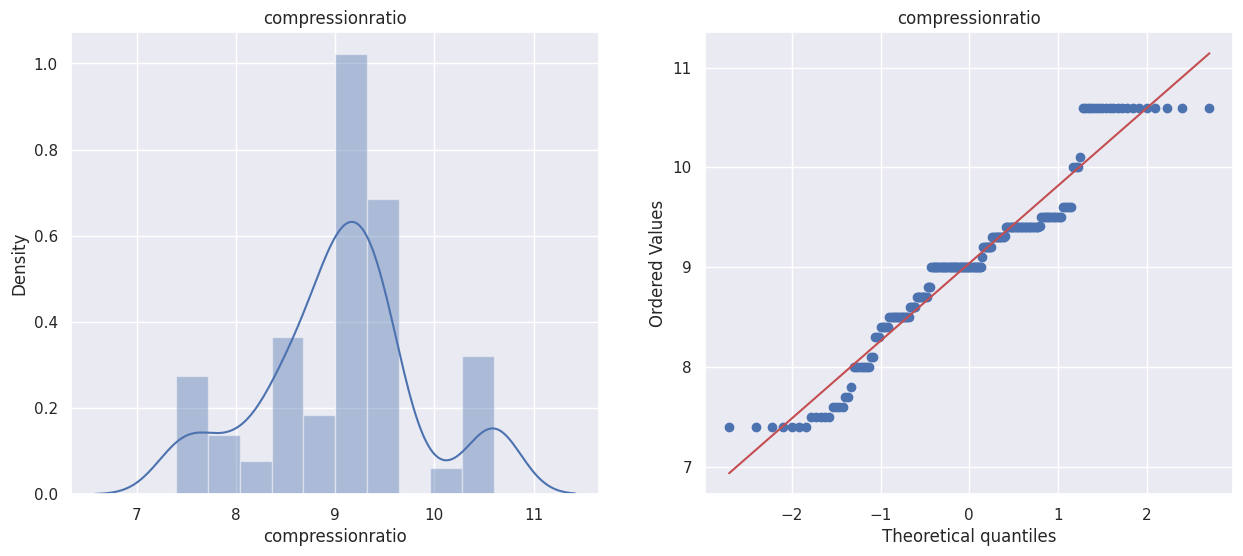

<ipython-input-294-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


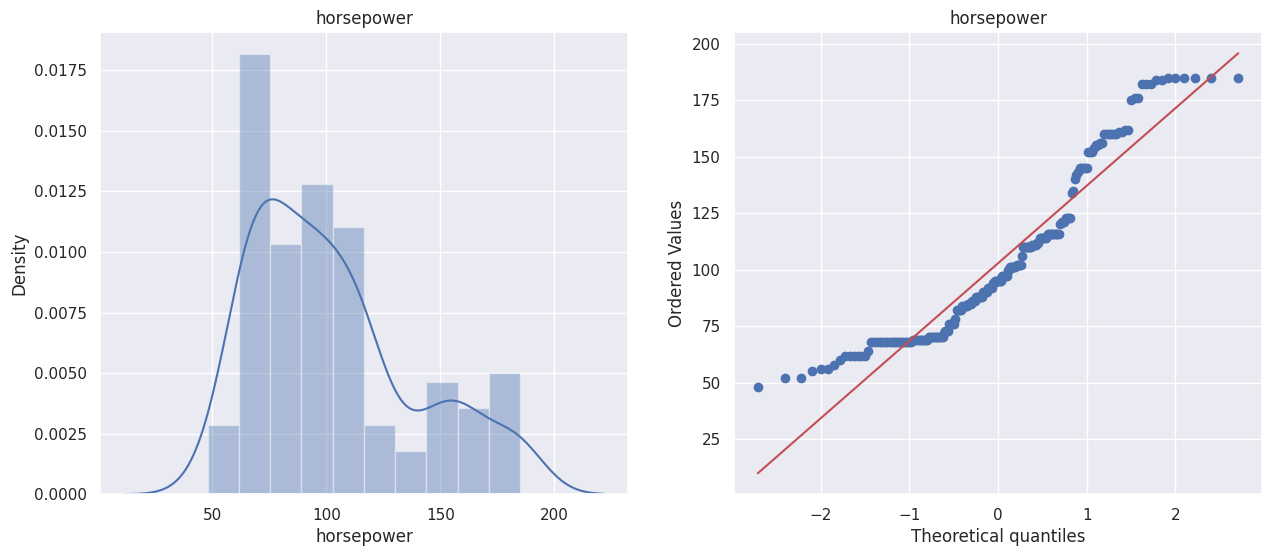

<ipython-input-294-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


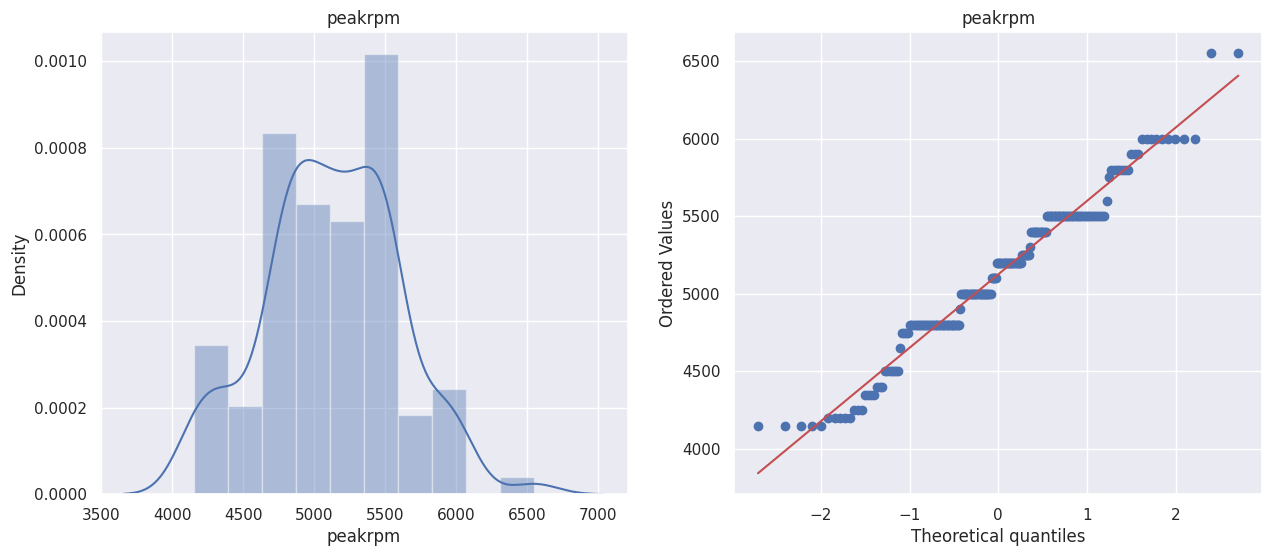

<ipython-input-294-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


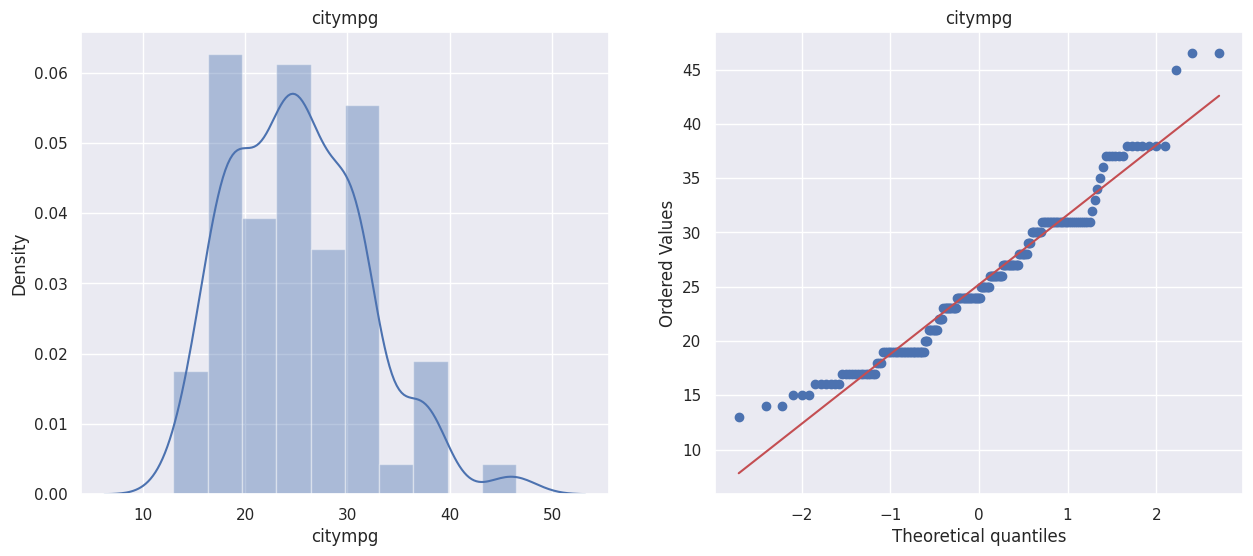

<ipython-input-294-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


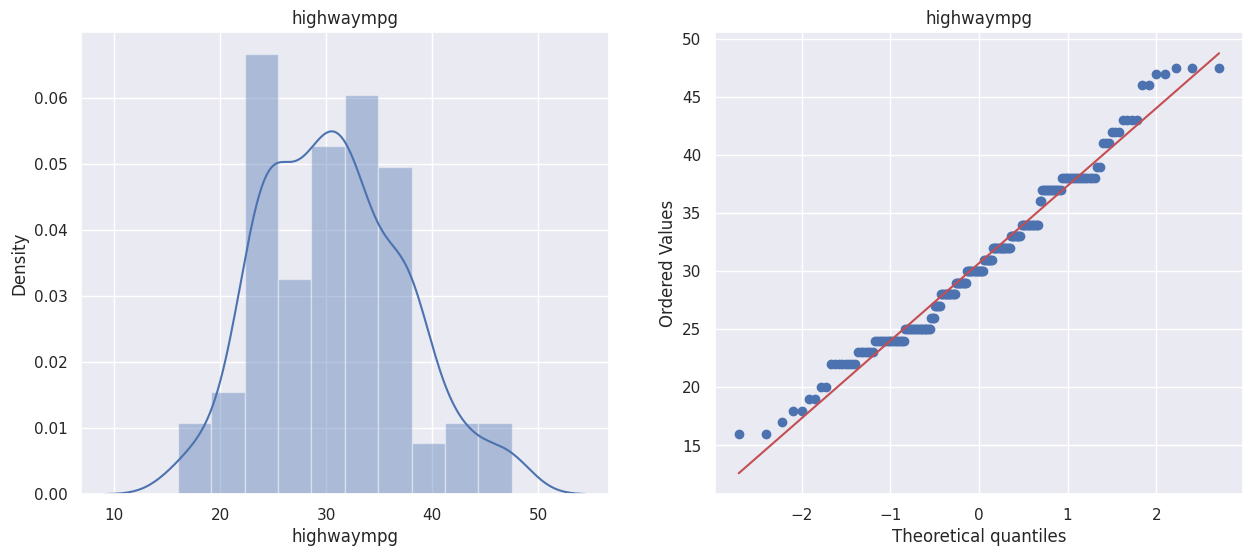

<ipython-input-294-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


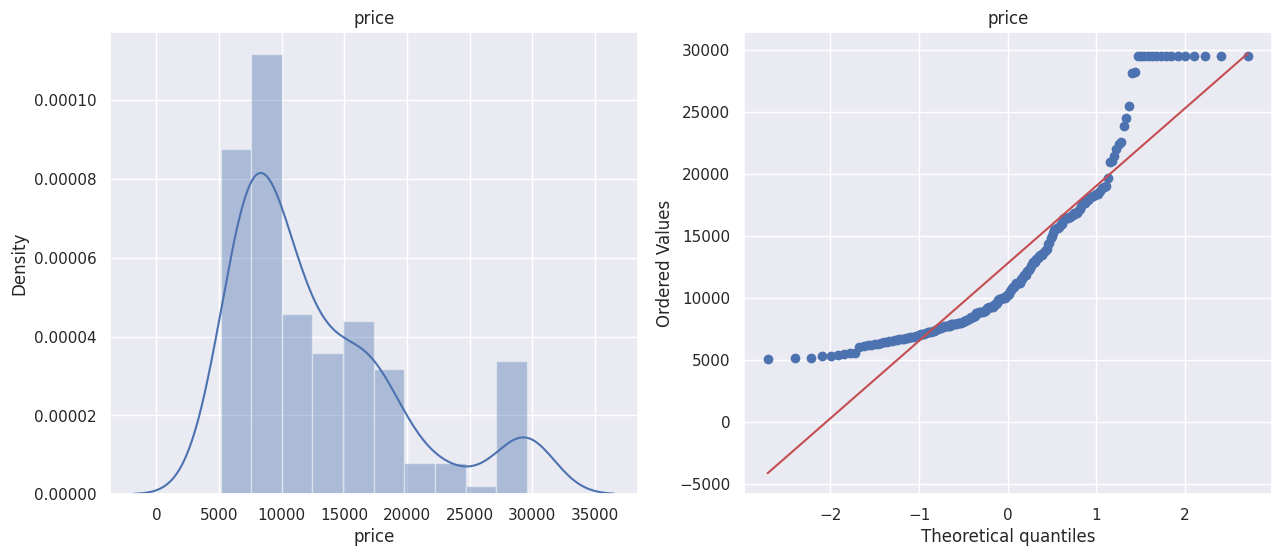

In [294]:
num_cols = df.select_dtypes(include=["int64","float64"])
def plots(num_cols, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    #num_cols[variable].hist()
    sns.distplot(num_cols[variable], kde=True, bins=10)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(num_cols[variable], dist="norm", plot=pylab)
    plt.title(variable)
    plt.show()
for i in num_cols.columns:
  plots(num_cols, i)

<ipython-input-295-50c0f90b2df7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)


<Axes: >

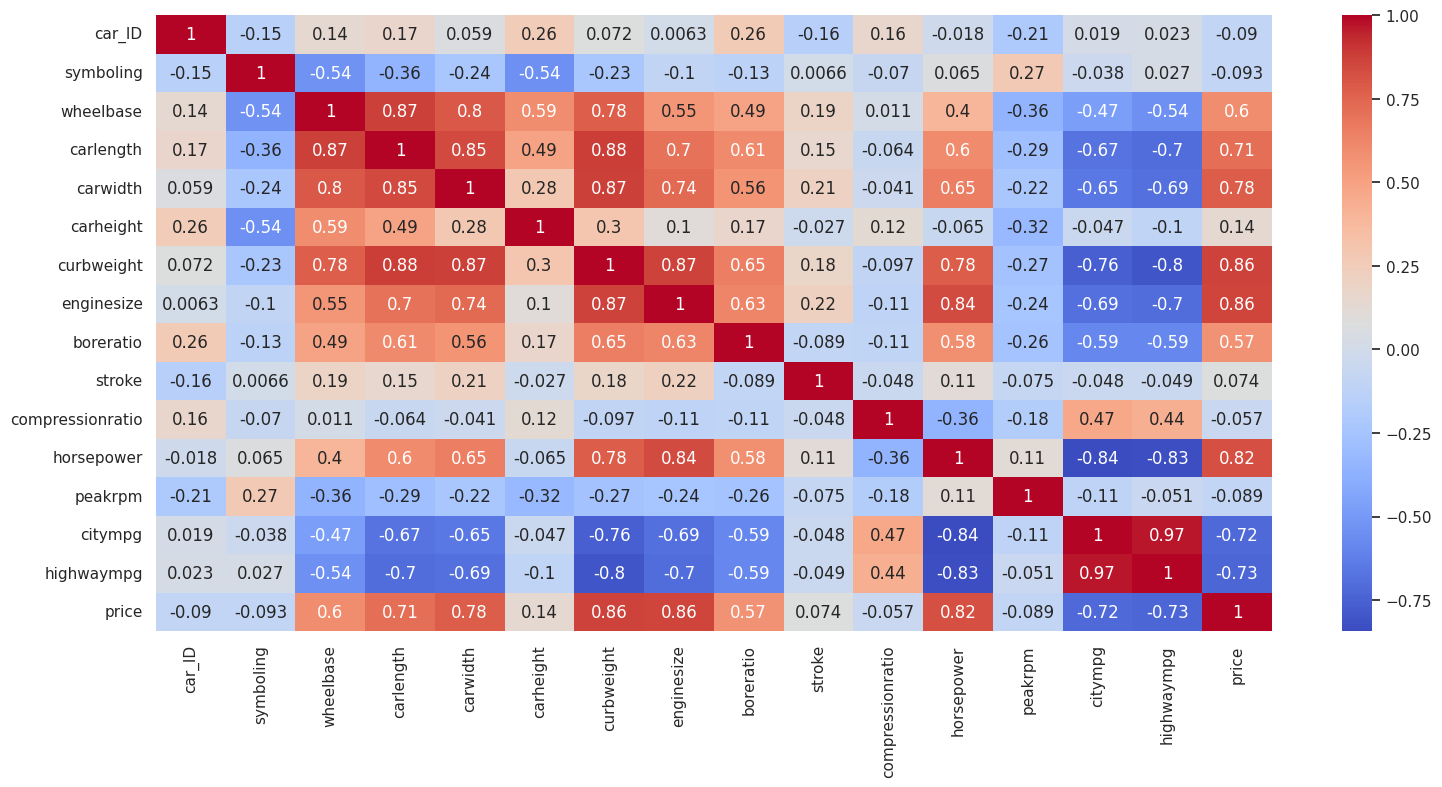

In [295]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)

  #### **Convert Categorical Data To Number**

In [296]:
le = LabelEncoder()
Label = df.select_dtypes(include=["object"])
df1 = df.copy()

for i in Label:
  df1[i] = le.fit_transform(df1[i])

df1.shape

(205, 26)

In [297]:
df1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,3.0,2,1,0,1,0,2,0,88.6,...,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,2.0,3.0,3,1,0,1,0,2,0,88.6,...,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,3.0,1.0,1,1,0,1,2,2,0,94.5,...,152.0,5,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,4.0,2.0,4,1,0,0,3,1,0,99.8,...,109.0,5,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,5.0,2.0,5,1,0,0,3,0,0,99.4,...,136.0,5,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


# **Feature Engineering**

#### **Mutual Information**

In [298]:
X = df1.iloc[:,2:25]
Y = df1.iloc[:,-1]

In [299]:
X.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,2,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,3,152.0,5,2.68,3.47,9.0,154.0,5000.0,19.0,26.0
3,4,1,0,0,3,1,0,99.8,176.6,66.2,...,2,109.0,5,3.19,3.40,10.0,102.0,5500.0,24.0,30.0
4,5,1,0,0,3,0,0,99.4,176.6,66.4,...,1,136.0,5,3.19,3.40,8.0,115.0,5500.0,18.0,22.0


In [300]:
mi_score1 = mutual_info_regression(X,Y)
mi_score1 = pd.Series(mi_score1)
mi_score1.index = X.columns
mi_score1.sort_values(ascending=True)

enginelocation      0.000000
doornumber          0.003030
fueltype            0.053397
aspiration          0.080864
carbody             0.091125
enginetype          0.170395
peakrpm             0.241351
compressionratio    0.283008
carheight           0.317828
drivewheel          0.323140
cylindernumber      0.324994
CarName             0.342597
stroke              0.343310
boreratio           0.451031
fuelsystem          0.472714
carlength           0.555744
wheelbase           0.583592
carwidth            0.663454
citympg             0.739795
enginesize          0.822806
highwaympg          0.860714
curbweight          0.865915
horsepower          0.877749
dtype: float64

<Axes: >

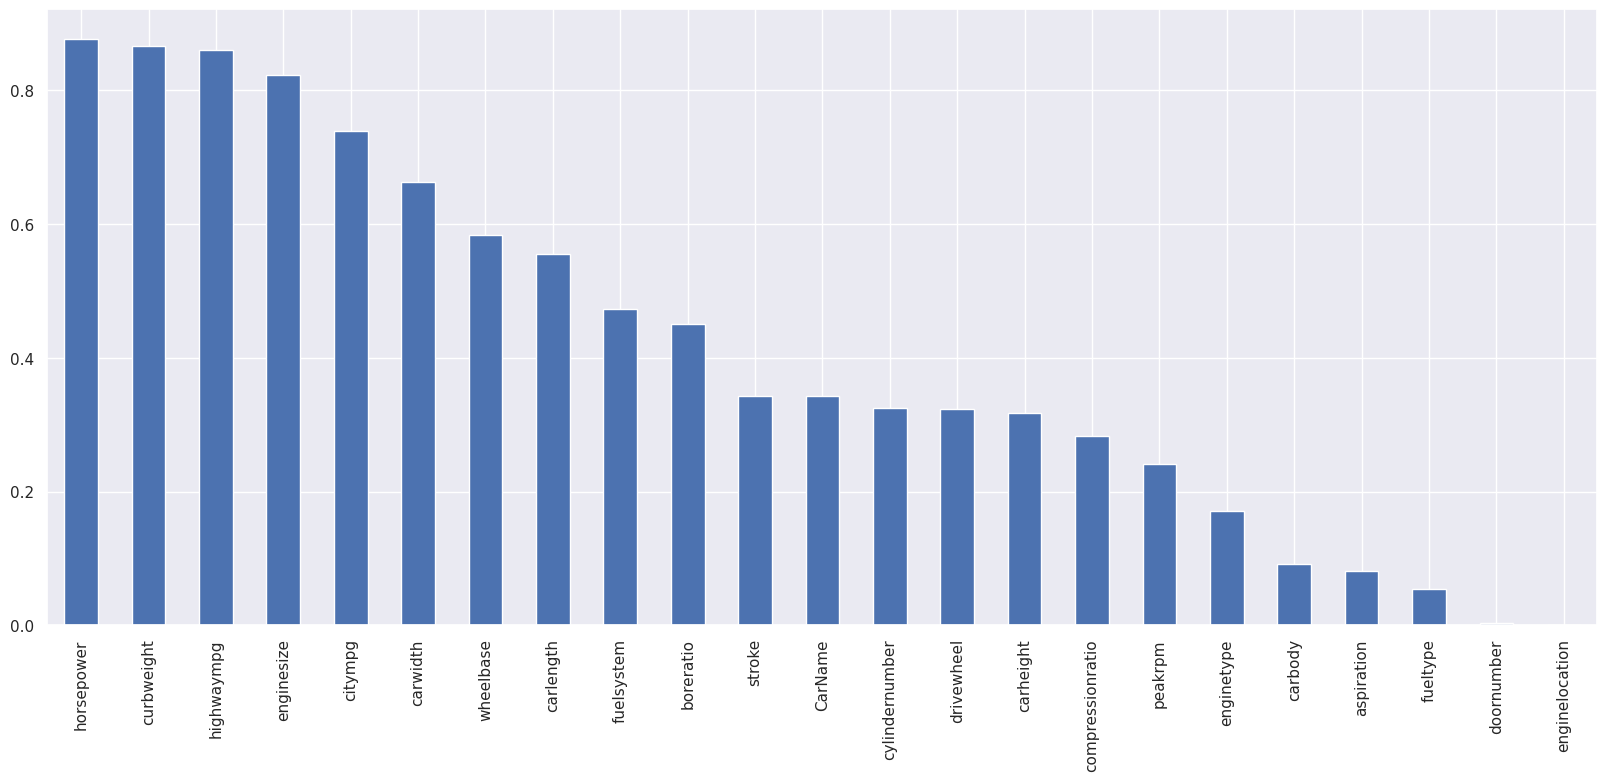

In [301]:
mi_score1.sort_values(ascending=False).plot.bar(figsize=(20, 8))

#### **Create New Feature**

In [302]:
X.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,2,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,3,152.0,5,2.68,3.47,9.0,154.0,5000.0,19.0,26.0
3,4,1,0,0,3,1,0,99.8,176.6,66.2,...,2,109.0,5,3.19,3.40,10.0,102.0,5500.0,24.0,30.0
4,5,1,0,0,3,0,0,99.4,176.6,66.4,...,1,136.0,5,3.19,3.40,8.0,115.0,5500.0,18.0,22.0


In [303]:
X['engine_displacement'] = X['cylindernumber'] * X['enginesize']
X['fuel_efficiency'] = (X['citympg'] + X['highwaympg']) / 2
#X['power_to_weight_ratio'] = X['horsepower'] / X['curbweight']
#X['car_size_index'] = X['carlength'] * X['carwidth'] * X['carheight']
X['quality_index'] = (X['enginesize'] + X['horsepower'] + X['curbweight']) / 3

In [304]:
X.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,engine_displacement,fuel_efficiency,quality_index
0,2,1,0,1,0,2,0,88.6,168.8,64.1,...,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,260.0,24.0,929.666667
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,260.0,24.0,929.666667
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,456.0,22.5,1043.000000
3,4,1,0,0,3,1,0,99.8,176.6,66.2,...,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,218.0,27.0,849.333333
4,5,1,0,0,3,0,0,99.4,176.6,66.4,...,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,136.0,20.0,1025.000000


In [305]:
mi_score1 = mutual_info_regression(X,Y)
mi_score1 = pd.Series(mi_score1)
mi_score1.index = X.columns
mi_score1.sort_values(ascending=True)

doornumber             0.025253
enginelocation         0.041341
fueltype               0.045562
carbody                0.062457
aspiration             0.071195
enginetype             0.167651
peakrpm                0.253169
compressionratio       0.288358
carheight              0.300771
drivewheel             0.320837
cylindernumber         0.329567
CarName                0.342232
stroke                 0.347834
fuelsystem             0.431367
boreratio              0.456181
carlength              0.542398
wheelbase              0.574436
carwidth               0.658359
citympg                0.740055
engine_displacement    0.771470
enginesize             0.806962
fuel_efficiency        0.810593
highwaympg             0.833873
curbweight             0.866269
horsepower             0.891800
quality_index          0.957998
dtype: float64

<Axes: >

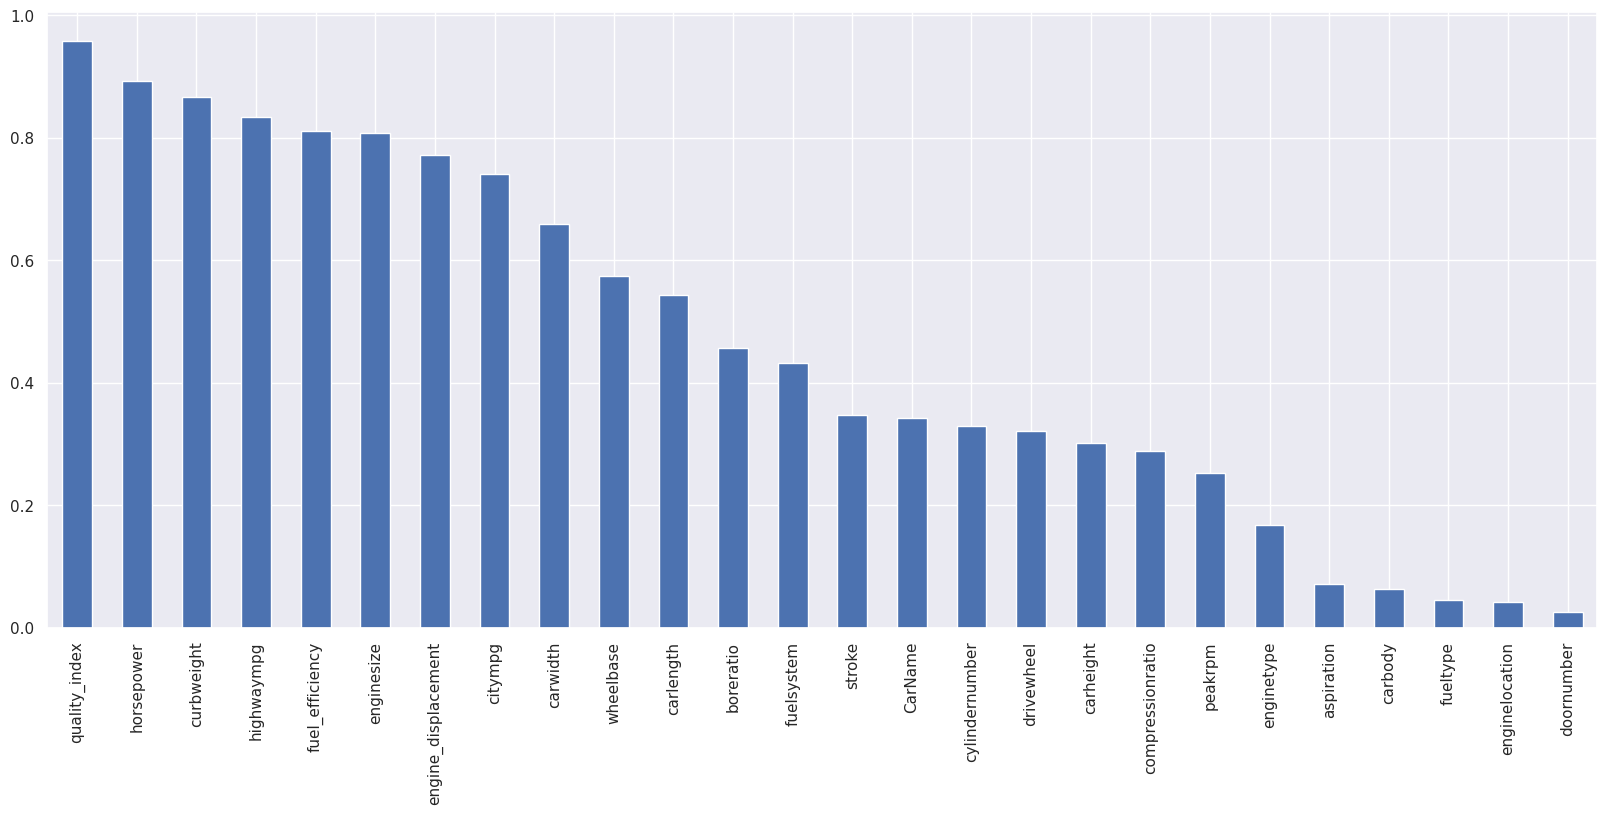

In [306]:
mi_score1.sort_values(ascending=False).plot.bar(figsize=(20, 8))

#### **Splitting Data into Train And Test**

In [307]:
train_data,test_data,train_label,test_label = train_test_split(X,Y,test_size=0.3, random_state=0)

In [308]:
print("train_data : ",train_data.shape)
print("train_label : ",train_label.shape)
print("test_data : ",test_data.shape)
print("test_label : ",test_label.shape)

train_data :  (143, 26)
train_label :  (143,)
test_data :  (62, 26)
test_label :  (62,)


#### **Normalize The Data**

In [309]:
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)
test_data_sc = sc.fit_transform(test_data)

In [310]:
train_data_sc

array([[-1.01906123,  0.36731544, -0.5043669 , ..., -0.36552588,
         0.37067152, -0.40878809],
       [-0.50072775,  0.36731544, -0.5043669 , ..., -0.19143695,
         0.20732475, -0.32650059],
       [-0.57477539,  0.36731544, -0.5043669 , ...,  1.08521518,
        -1.2627962 , -0.43793158],
       ...,
       [ 0.2644312 ,  0.36731544,  1.98268366, ..., -0.01734802,
        -1.09944943,  1.0278145 ],
       [-0.69818812,  0.36731544, -0.5043669 , ...,  2.54320994,
        -1.75283651,  2.81585328],
       [ 1.15300288,  0.36731544, -0.5043669 , ...,  0.1567409 ,
        -0.11936879,  0.73809393]])

#### **PCA**

In [311]:
pc = PCA()
train_data_sc_pc = pc.fit_transform(train_data_sc)
test_data_sc_pc = pc.fit_transform(test_data_sc)

In [312]:
explained_variance = pc.explained_variance_ratio_

In [313]:
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [4.05240221e-01 1.20489362e-01 8.94436062e-02 7.06302635e-02
 5.31723838e-02 4.86975078e-02 4.48246661e-02 3.31399706e-02
 2.96973159e-02 2.43185900e-02 1.73617345e-02 1.37067216e-02
 1.15573790e-02 8.99812508e-03 7.65990502e-03 5.75734974e-03
 5.26716929e-03 3.10786543e-03 2.93086329e-03 1.91087152e-03
 1.15635392e-03 5.99249313e-04 3.32525564e-04 2.05002042e-33
 2.05002042e-33 2.05002042e-33]


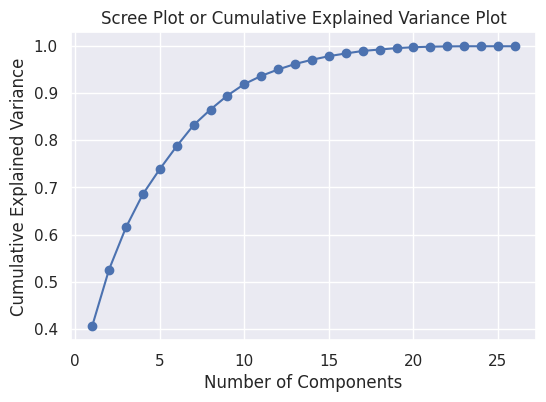

In [314]:
# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance)


# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

In [315]:
# Cumulative explained variance nikalen
cumulative_variance = np.cumsum(explained_variance)

# Kitne components select karna hai, yeh decide karen
desired_variance = 0.95  # Example: 95% variance ko capture karna hai

# Kitne components select kiye ja sakte hain
num_components = np.argmax(cumulative_variance >= desired_variance) + 1

print(f"\nNumber of components selected: {num_components}")


Number of components selected: 12


In [317]:
pc = PCA(n_components=12)
train_data_sc_pc = pc.fit_transform(train_data_sc)
test_data_sc_pc = pc.fit_transform(test_data_sc)

In [318]:
explained_variance = pc.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.40524022 0.12048936 0.08944361 0.07063026 0.05317238 0.04869751
 0.04482467 0.03313997 0.02969732 0.02431859 0.01736173 0.01370672]


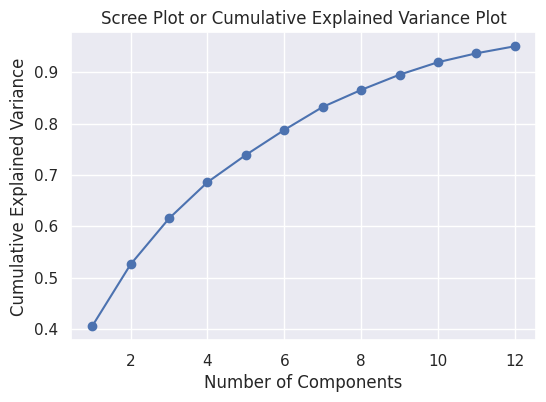

In [319]:
# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance)


# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

# **Model**

#### **Linear Regression**

In [320]:
model_lr = LinearRegression().fit(train_data_sc_pc,train_label).fit(train_data_sc_pc,train_label)

In [321]:
y_pred = model_lr.predict(test_data_sc_pc)
y_pred

array([ 8396.87721399, 18922.33914516, 14559.68841772,  1839.51844402,
        9073.51105985, 16965.46490908,  5426.93269435,  8569.91795829,
       20031.82914574,  5161.37772621, 21942.28238034, 21897.17651549,
       10959.08458335, 14908.4773158 ,  3909.59185435, 15984.98989694,
        9890.72142476, 16829.19642589,  8646.26136272,  7555.2126221 ,
        8372.02670126, 21494.94030688, 10912.47603742, 16595.33147487,
       21321.50491719, 10817.75598953,  7665.93395564, 22948.18235021,
        8844.24971301,  8324.76223141, 10475.5401981 , 10082.37346312,
       17445.7563922 , 12313.36668355,  5880.41183626, 25756.20535491,
       11110.98727662, 15904.15809371,  6182.65895425, 31946.85591744,
        5599.80038855, 13123.45742325, 29428.26942255, 18873.7336601 ,
       10816.92564135,  4828.95412917,  4065.16459744, 13139.05516393,
       11499.43338634,  8879.19076351, 16632.40849639,  6932.94004892,
       11154.1150959 , 13727.0155401 , 20152.37071232, 21807.53573437,
      

In [322]:
print("Mean Absolute Error : ",mean_absolute_error(y_pred,test_label))
print("Mean Squared Error : ",mean_squared_error(y_pred,test_label))
print("R2_Score : ",r2_score(y_pred,test_label))

Mean Absolute Error :  2517.9580877776916
Mean Squared Error :  10268672.00528738
R2_Score :  0.7613593059662475


In [323]:
print(" Train Data Cross_val_score : ",cross_val_score(model_lr,train_data_sc_pc,train_label,cv=5).mean())
print("Test Data Cross_val_score : ",cross_val_score(model_lr,test_data_sc_pc,test_label,cv=5).mean())

 Train Data Cross_val_score :  0.8436586302042146
Test Data Cross_val_score :  0.7159938524184992


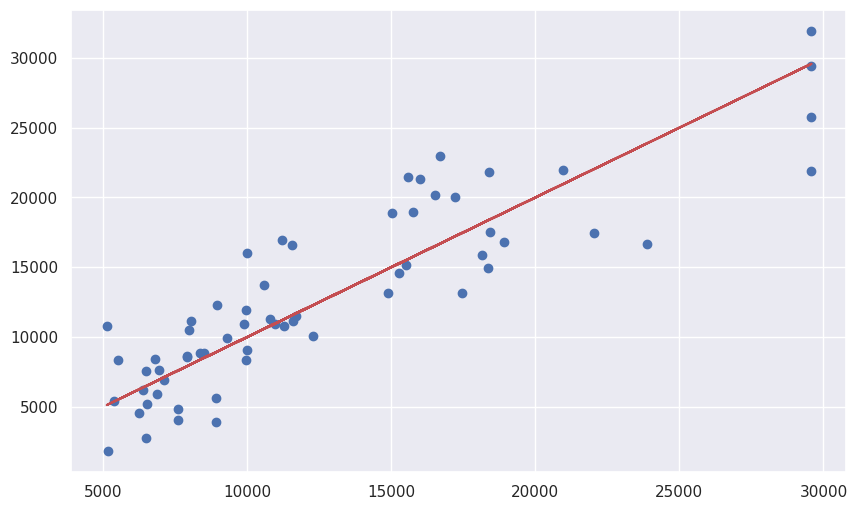

In [324]:
plt.figure(figsize=(10,6))
plt.scatter(test_label,y_pred)
plt.plot(test_label,test_label,'r')

#### **Ridge Model**

In [325]:
model_ridge = Ridge(alpha= 1.0).fit(train_data_sc_pc,train_label)

In [326]:
y_pred_4 = model_ridge.predict(test_data_sc_pc)

In [327]:
print("Mean Absolute Error : ",mean_absolute_error(y_pred_4,test_label))
print("Mean Squared Error : ",mean_squared_error(y_pred_4,test_label))
print("R2_Score : ",r2_score(y_pred_4,test_label))

Mean Absolute Error :  2512.094425773144
Mean Squared Error :  10223179.038446791
R2_Score :  0.7616714505579733


In [328]:
print(" Train Data Cross_val_score : ",cross_val_score(model_ridge,train_data_sc_pc,train_label,cv=5).mean())
print("Test Data Cross_val_score : ",cross_val_score(model_ridge,test_data_sc_pc,test_label,cv=5).mean())

 Train Data Cross_val_score :  0.8437069666470807
Test Data Cross_val_score :  0.7262022724480766


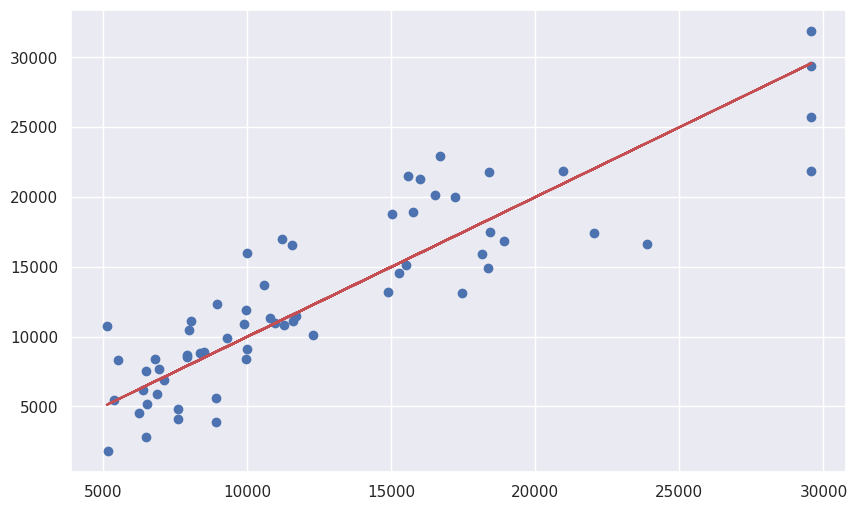

In [329]:
plt.figure(figsize=(10,6))
plt.scatter(test_label,y_pred_4)
plt.plot(test_label,test_label,'r')

#### **Random Forest Model**

In [330]:
model_rf = RandomForestRegressor(max_depth= None, n_estimators= 200).fit(train_data_sc_pc,train_label)

In [331]:
model_rf.score(train_data_sc_pc,train_label)

0.9849200112110187

In [332]:
y_pred_2 = model_rf.predict(test_data_sc_pc)

In [333]:
print("Mean Absolute Error : ",mean_absolute_error(y_pred_2,test_label))
print("Mean Squared Error : ",mean_squared_error(y_pred_2,test_label))
print("R2_Score : ",r2_score(y_pred_2,test_label))

Mean Absolute Error :  1855.7153616935486
Mean Squared Error :  6944779.265158089
R2_Score :  0.772396522880537


In [334]:
print(" Train Data Cross_val_score : ",cross_val_score(model_rf,train_data_sc_pc,train_label,cv=5).mean())
print("Test Data Cross_val_score : ",cross_val_score(model_rf,test_data_sc_pc,test_label,cv=5).mean())

 Train Data Cross_val_score :  0.8665114703003836
Test Data Cross_val_score :  0.7398572840313276


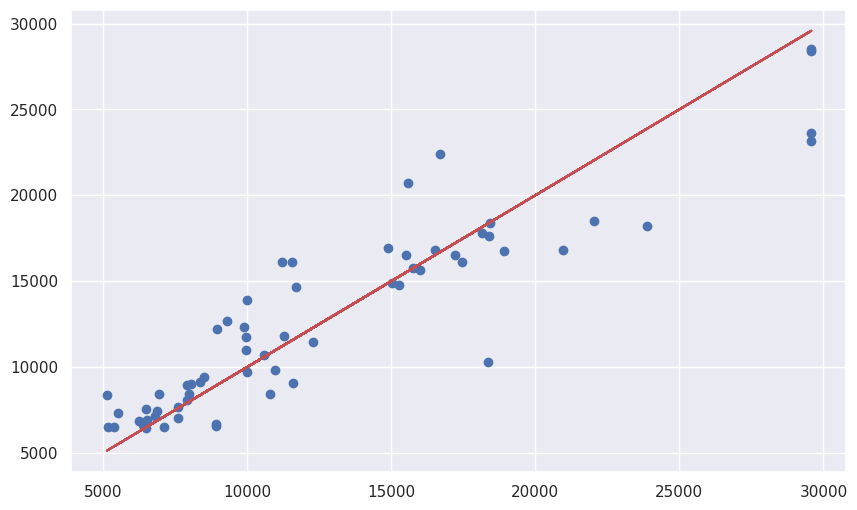

In [335]:
plt.figure(figsize=(10,6))
plt.scatter(test_label,y_pred_2)
plt.plot(test_label,test_label,'r')

#### **Decision Tree Model**

In [343]:
model_tree = DecisionTreeRegressor(max_depth= 5, min_samples_leaf= 1, min_samples_split = 10).fit(train_data_sc_pc,train_label)

In [344]:
y_pred_3 = model_tree.predict(test_data_sc_pc)

In [345]:
print("Mean Absolute Error : ",mean_absolute_error(y_pred_3,test_label))
print("Mean Squared Error : ",mean_squared_error(y_pred_3,test_label))
print("R2_Score : ",r2_score(y_pred_3,test_label))

Mean Absolute Error :  2153.615852360005
Mean Squared Error :  8908624.269623565
R2_Score :  0.7508070828059172


In [346]:
print(" Train Data Cross_val_score : ",cross_val_score(model_tree,train_data_sc_pc,train_label,cv=5).mean())
print("Test Data Cross_val_score : ",cross_val_score(model_tree,test_data_sc_pc,test_label,cv=5).mean())

 Train Data Cross_val_score :  0.8276322278415007
Test Data Cross_val_score :  0.6503959943276734


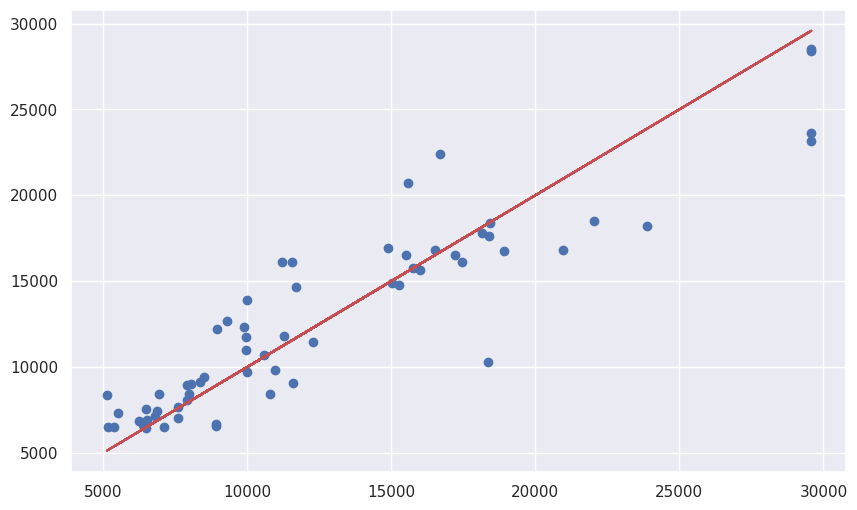

In [347]:
plt.figure(figsize=(10,6))
plt.scatter(test_label,y_pred_2)
plt.plot(test_label,test_label,'r')